## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to **provide recommendations to the Policy Maker and Marketing Team** and also **build a model to predict the potential customer** who is going to purchase the newly introduced travel package.

## Objective
To predict which customer is more likely to purchase the newly introduced travel package.

## Data Information

**Customer details:**

1. CustomerID: Unique customer ID

2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)

3. Age: Age of customer

4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3

6. Occupation: Occupation of customer

7. Gender: Gender of customer

8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer

9. PreferredPropertyStar: Preferred hotel property rating by customer

10. MaritalStatus: Marital status of customer

11. NumberOfTrips: Average number of trips in a year by customer

12. Passport: The customer has a passport or not (0: No, 1: Yes)

13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)

14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer

15. Designation: Designation of the customer in the current organization

16. MonthlyIncome: Gross monthly income of the customer

## Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

# NECESSARY CODING

### 1.0 Import necessary libraries

In [132]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression


<IPython.core.display.Javascript object>

### 1.1 Load the dataset
The dataset containing Customers details is contained in the file titled "Tourism.csv" in my particular directory.

**openpyxl is a Python library to read/write Excel 2010 xlsx/xlsm/xltx/xltm files.**

In [133]:
! pip install openpyxl

<IPython.core.display.Javascript object>

In [134]:
my_dataset = pd.read_excel("Tourism.xlsx", sheet_name=1)

print(my_dataset)

      CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gende

<IPython.core.display.Javascript object>

In [135]:
# copying data to another varaible to avoid any changes to original data
data = my_dataset.copy()

<IPython.core.display.Javascript object>

### 1.2 Check out the shape of the dataset

In [136]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 4888 rows and 20 columns.


<IPython.core.display.Javascript object>

In [137]:
data.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# There are 3 steps in Data Preprocessing:

# STEP A :Data format checking:
- Data Dimensioning
- checking the Data types

### 1.3A Checking the length of the dataset ()

In [138]:
len(data)

4888

<IPython.core.display.Javascript object>

### 1.4A To view first 5 rows of the dataset

In [139]:
data.head()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

<IPython.core.display.Javascript object>

### 1.5A To view the last 5 rows of the dataset

In [140]:
data.tail()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883          1  49.0     Self Enquiry         3              9.0   
4884          1  28.0  Company Invited         1             31.0   
4885          1  52.0     Self Enquiry         3             17.0   
4886          1  19.0     Self Enquiry         3             16.0   
4887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

<IPython.core.display.Javascript object>

### 1.6A To view 10 samples of the dataset

In [141]:
# let's view a sample of the data
data.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
2055          1  23.0     Self Enquiry         1             12.0   
3626          0  37.0  Company Invited         1              7.0   
4812          0  44.0     Self Enquiry         1             10.0   
3047          0  46.0     Self Enquiry         1              9.0   
121           0  33.0  Company Invited         3             28.0   
278           0  26.0  Company Invited         1              6.0   
3507          0  30.0     Self Enquiry         3             26.0   
3536          0  46.0     Self Enquiry         1             35.0   
1623          0  45.0     Self Enquiry         1             15.0   
1740          0  55.0     Self Enquiry         1              6.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
2055        Salaried    Male                       3                1.0   
3626  Small Business  Female                       3                5.0   
4812        Salaried    Male                       4                6.0   
3047        Salaried  Female                       4                5.0   
121   Small Business    Male                       3                3.0   
278         Salaried  Female                       2                3.0   
3507        Salaried    Male                       4                5.0   
3536  Large Business    Male                       4                4.0   
1623        Salaried    Male                       2                3.0   
1740  Small Business    Male                       2                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
2055          Basic                    5.0       Married            2.0   
3626         Deluxe                    3.0       Married            2.0   
4812           King                    NaN       Married            5.0   
3047          Basic                    3.0        Single            3.0   
121          Deluxe                    4.0      Divorced            1.0   
278          Deluxe                    4.0       Married            2.0   
3507         Deluxe                    3.0       Married            3.0   
3536          Basic                    3.0       Married            6.0   
1623         Deluxe                    4.0       Married            1.0   
1740           King                    5.0        Single            1.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
2055         1                       3       0                       0.0   
3626         0                       5       1                       2.0   
4812         0                       5       1                       1.0   
3047         0                       3       1                       2.0   
121          0                       2       0                       1.0   
278          0                       5       0                       1.0   
3507         0                       4       1                       1.0   
3536         0                       3       1                       3.0   
1623         0                       4       1                       0.0   
1740         1                       1       1                       1.0   

     Designation  MonthlyIncome  
2055   Executive        16601.0  
3626     Manager        23052.0  
4812          VP        38418.0  
3047   Executive        20952.0  
121      Manager        21146.0  
278      Manager        21397.0  
3507     Manager        27298.0  
3536   Executive        20810.0  
1623     Manager        17348.0  
1740          VP        34045.0

<IPython.core.display.Javascript object>

### 1.7A checking the names of the columns in the data

In [142]:
print(data.columns)

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


<IPython.core.display.Javascript object>

### 1.8A checking column datatypes and number of non-null values

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

<IPython.core.display.Javascript object>

#### Observations
1. Seven columns are of **float** type.
2. Six(6) columns are of **int** type 
3. Dependent variable is ProdTaken. It is of **Int** type.
4. Six columns are of **object** type.


## Lets convert the columns with an 'object' datatype into categorical variables

In [144]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.head(10)

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0   NaN     Self Enquiry         1              8.0   
5          0  32.0  Company Invited         1              8.0   
6          0  59.0     Self Enquiry         1              9.0   
7          0  30.0     Self Enquiry         1             30.0   
8          0  38.0  Company Invited         1             29.0   
9          0  36.0     Self Enquiry         1             33.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   
5        Salaried    Male                       3                3.0   
6  Small Business  Female                       2                2.0   
7        Salaried    Male                       3                3.0   
8        Salaried    Male                       2                4.0   
9  Small Business    Male                       3                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   
5          Basic                    3.0        Single            1.0   
6          Basic                    5.0      Divorced            5.0   
7          Basic                    3.0       Married            2.0   
8       Standard                    3.0     Unmarried            1.0   
9         Deluxe                    3.0      Divorced            7.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   
5         0                       5       1                       1.0   
6         1                       2       1                       1.0   
7         0                       2       0                       1.0   
8         0                       3       0                       0.0   
9         0                       3       1                       0.0   

      Designation  MonthlyIncome  
0         Manager        20993.0  
1         Manager        20130.0  
2       Executive        17090.0  
3       Executive        17909.0  
4       Executive        18468.0  
5       Executive        18068.0  
6       Executive        17670.0  
7       Executive        17693.0  
8  Senior Manager        24526.0  
9         Manager        20237.0

<IPython.core.display.Javascript object>

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

<IPython.core.display.Javascript object>

In [146]:
data["ProdTaken"].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

<IPython.core.display.Javascript object>

#### Observations
1. 3968 customers did not purchase the travel package.
2. 920 customers purchased the travel package.


# STEP B IN DATA PROCESSING-------Data Consistency:
- Checking for missing values.
- Checking for inconsistency.
- Checking for duplicate values.
- Checking for outliers.
- Checking data distribution and skewness

### 1.10B checking if the dataset has duplicate values


In [147]:
data[data.duplicated()].count()


ProdTaken                   141
Age                         131
TypeofContact               141
CityTier                    141
DurationOfPitch             136
Occupation                  141
Gender                      141
NumberOfPersonVisiting      141
NumberOfFollowups           140
ProductPitched              141
PreferredPropertyStar       141
MaritalStatus               141
NumberOfTrips               139
Passport                    141
PitchSatisfactionScore      141
OwnCar                      141
NumberOfChildrenVisiting    135
Designation                 141
MonthlyIncome               132
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. There are duplicate values in the dataset

### 1.11B checking for missing values in the data.

In [148]:
# checking missing values in rest of the data
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* There are missing values in the some **features** or **columns**:
1. Age.
2. TypeofContact.
3. Duration ofPitch.
4. NumberOfFollowups.
5. PreferredPropertyStar.
6. NumberOfTrips.
7. NumberOfChildrenVisiting.
8. MonthlyIncome.

#### Step 1 - Treating The Missing Value In The Age Column

1. Handling the missing values in the **[Age]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [149]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)


<IPython.core.display.Javascript object>

###  Analyzing the missing values in the [Age] column.

In [150]:
data[data.Age.isnull()]

ProdTaken  Age    TypeofContact  CityTier  DurationOfPitch  \
4             0  NaN     Self Enquiry         1              8.0   
11            0  NaN     Self Enquiry         1             21.0   
19            0  NaN     Self Enquiry         1              8.0   
20            0  NaN  Company Invited         1             17.0   
21            1  NaN     Self Enquiry         3             15.0   
...         ...  ...              ...       ...              ...   
2410          1  NaN     Self Enquiry         1             30.0   
2413          1  NaN     Self Enquiry         3             21.0   
2427          1  NaN     Self Enquiry         3             22.0   
2430          1  NaN     Self Enquiry         1             14.0   
2435          1  NaN     Self Enquiry         2             26.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4     Small Business    Male                       2                3.0   
11          Salaried  Female                       2                4.0   
19          Salaried    Male                       2                3.0   
20          Salaried  Female                       3                2.0   
21          Salaried    Male                       2                4.0   
...              ...     ...                     ...                ...   
2410  Small Business    Male                       2                3.0   
2413  Small Business    Male                       2                5.0   
2427  Small Business    Male                       3                3.0   
2430  Small Business  Female                       3                3.0   
2435  Small Business  Female                       3                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4             Basic                    4.0      Divorced            1.0   
11           Deluxe                    3.0        Single            1.0   
19            Basic                    3.0        Single            6.0   
20           Deluxe                    3.0       Married            1.0   
21           Deluxe                    5.0        Single            1.0   
...             ...                    ...           ...            ...   
2410          Basic                    4.0       Married            2.0   
2413         Deluxe                    3.0       Married            7.0   
2427       Standard                    3.0       Married            3.0   
2430          Basic                    5.0       Married            2.0   
2435          Basic                    4.0       Married            1.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4            0                       5       1                       0.0   
11           1                       3       0                       0.0   
19           1                       4       0                       1.0   
20           0                       3       1                       2.0   
21           0                       2       0                       0.0   
...        ...                     ...     ...                       ...   
2410         1                       1       0                       0.0   
2413         1                       1       0                       1.0   
2427         0                       5       0                       1.0   
2430         1                       3       0                       2.0   
2435         1                       3       0                       1.0   

         Designation  MonthlyIncome  
4          Executive        18468.0  
11           Manager            NaN  
19         Executive            NaN  
20           Manager            NaN  
21           Manager        18407.0  
...              ...            ...  
2410       Executive            NaN  
2413         Manager        18423.0  
2427  Senior Manager        18544.0  
2430       Executive            NaN  
2435       Executive        18669.0  

[226 rows x 19 co

<IPython.core.display.Javascript object>

In [151]:
data["Age"].fillna(data.Age.median(), inplace=True)
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[Age]** column has been replaced with **median value**.

#### Step 2 - Treating The Missing Value In The [TypeofContact] Column

1. Handling the missing values in the **[TypeofContact]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

#### Now, i will check the number of unique values and the number of times they occur for the **[TypeofContact]** column.

In [152]:
data.TypeofContact.value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

In [153]:
# checking for missing values in the data.
data[data.TypeofContact.isnull()]

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
224           0  31.0           NaN         1              NaN   
571           0  26.0           NaN         1              NaN   
572           0  29.0           NaN         1              NaN   
576           0  27.0           NaN         3              NaN   
579           0  34.0           NaN         1              NaN   
598           1  28.0           NaN         1              NaN   
622           0  32.0           NaN         3              NaN   
724           0  24.0           NaN         1              NaN   
843           0  26.0           NaN         1              NaN   
1021          1  25.0           NaN         3              NaN   
1047          0  33.0           NaN         3              NaN   
1143          0  45.0           NaN         3              NaN   
1182          0  36.0           NaN         1              NaN   
1217          0  24.0           NaN         1              NaN   
1356          0  41.0           NaN         3              NaN   
1469          0  34.0           NaN         1              NaN   
1694          0  31.0           NaN         1              NaN   
2041          0  26.0           NaN         1              NaN   
2042          0  29.0           NaN         1              NaN   
2046          0  27.0           NaN         3              NaN   
2049          0  34.0           NaN         1              NaN   
2068          1  28.0           NaN         1              NaN   
2092          0  32.0           NaN         3              NaN   
2194          0  24.0           NaN         1              NaN   
2313          0  26.0           NaN         1              NaN   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
224   Small Business    Male                       2                5.0   
571         Salaried  Female                       3                5.0   
572   Small Business  Female                       3                3.0   
576   Small Business    Male                       2                3.0   
579   Small Business  Female                       2                4.0   
598   Small Business    Male                       2                3.0   
622         Salaried    Male                       3                3.0   
724   Small Business  Female                       2                4.0   
843   Small Business    Male                       2                1.0   
1021        Salaried    Male                       3                4.0   
1047  Small Business    Male                       2                3.0   
1143  Small Business    Male                       2                4.0   
1182  Small Business  Female                       2                4.0   
1217  Small Business    Male                       3                1.0   
1356  Small Business  Female                       2                3.0   
1469  Small Business    Male                       2                1.0   
1694  Small Business    Male                       2                5.0   
2041        Salaried  Female                       3                5.0   
2042  Small Business  Female                       3                3.0   
2046  Small Business    Male                       2                3.0   
2049  Small Business  Female                       2                4.0   
2068  Small Business    Male                       2                3.0   
2092        Salaried    Male                       3                3.0   
2194  Small Business  Female                       2                4.0   
2313  Small Business    Male                       2                1.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
224          Deluxe                    3.0      Divorced            1.0   
571           Basic                    3.0       Married            4.0   
572          Deluxe                    3.0      Divorced            5.0   
576          Deluxe                   

<IPython.core.display.Javascript object>

### I will fill the remaining missing values in **[TypeofContact]** column by column is_missing.

In [154]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
data["TypeofContact"] = data["TypeofContact"].astype(str).replace("nan", "is_missing")


# checking missing values in rest of the data
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[TypeofContact ]** column has been replaced with **is_missing**.

#### Step 3 - Treating The Missing Value In The [DurationOfPitch] Column

1. Handling the missing values in the **[DurationOfPitch]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [155]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)
data[data.DurationOfPitch.isnull()]

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
46            0  34.0  Company Invited         3              NaN   
75            0  31.0     Self Enquiry         1              NaN   
76            0  35.0     Self Enquiry         3              NaN   
84            0  34.0     Self Enquiry         1              NaN   
103           0  34.0     Self Enquiry         1              NaN   
...         ...   ...              ...       ...              ...   
4215          0  19.0     Self Enquiry         3              NaN   
4427          1  21.0     Self Enquiry         1              NaN   
4641          0  19.0  Company Invited         1              NaN   
4678          0  29.0     Self Enquiry         3              NaN   
4825          1  26.0     Self Enquiry         1              NaN   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
46    Small Business    Male                       3                3.0   
75          Salaried  Female                       3                3.0   
76    Small Business    Male                       2                4.0   
84    Small Business    Male                       3                3.0   
103         Salaried  Female                       2                3.0   
...              ...     ...                     ...                ...   
4215  Small Business  Female                       4                5.0   
4427  Small Business    Male                       3                4.0   
4641        Salaried    Male                       4                4.0   
4678  Small Business    Male                       4                4.0   
4825        Salaried    Male                       3                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
46           Deluxe                    3.0        Single            1.0   
75           Deluxe                    3.0        Single            2.0   
76           Deluxe                    5.0        Single            1.0   
84           Deluxe                    4.0      Divorced            2.0   
103          Deluxe                    3.0        Single            2.0   
...             ...                    ...           ...            ...   
4215          Basic                    3.0        Single            3.0   
4427          Basic                    3.0        Single            3.0   
4641          Basic                    3.0        Single            3.0   
4678          Basic                    4.0       Married            3.0   
4825          Basic                    5.0       Married            6.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
46           0                       5       1                       1.0   
75           0                       5       0                       1.0   
76           0                       2       0                       1.0   
84           0                       5       0                       0.0   
103          0                       3       1                       0.0   
...        ...                     ...     ...                       ...   
4215         0                       1       0                       3.0   
4427         1                       5       1                       2.0   
4641         0                       1       0                       2.0   
4678         0                       5       0                       3.0   
4825         0                       5       1                       1.0   

     Designation  MonthlyIncome  
46       Manager        19568.0  
75       Manager            NaN  
76       Manager            NaN  
84       Manager            NaN  
103      Manager        19809.0  
...          ...            ...  
4215   Executive        19878.0  
4427   Executive        19687.0  
4641   Executive        19729.0  
4678   Executive        19730.0  
4825   Executive        19796.0  

[251 rows x 19 columns]

<IPython.core.display.Javascript object>

In [156]:
data["DurationOfPitch"].fillna(data.DurationOfPitch.median(), inplace=True)
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[DurationOfPitch]** column has been replaced with **median value**.

#### Step 4 - Treating The Missing Value In The [NumberOfFollowups] Column

1. Handling the missing values in the **[NumberOfFollowups]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [157]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)
data[data.NumberOfFollowups.isnull()]

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
79            0  46.0     Self Enquiry         2             11.0   
94            0  32.0     Self Enquiry         3             12.0   
96            0  24.0     Self Enquiry         3              9.0   
122           1  56.0     Self Enquiry         1             20.0   
135           0  36.0     Self Enquiry         1             12.0   
174           0  45.0     Self Enquiry         3             10.0   
317           1  52.0     Self Enquiry         1             14.0   
322           0  32.0     Self Enquiry         1              8.0   
376           0  51.0     Self Enquiry         3             20.0   
532           0  47.0     Self Enquiry         3             20.0   
629           0  28.0     Self Enquiry         2             14.0   
737           0  41.0     Self Enquiry         1             13.0   
748           1  26.0  Company Invited         3             35.0   
820           0  35.0  Company Invited         3             17.0   
881           0  32.0  Company Invited         1              8.0   
885           0  25.0     Self Enquiry         3             16.0   
1159          0  39.0  Company Invited         1             10.0   
1215          0  35.0  Company Invited         1              8.0   
1234          0  47.0  Company Invited         3              8.0   
1244          0  30.0  Company Invited         1              8.0   
1352          0  44.0     Self Enquiry         1              6.0   
1389          0  31.0  Company Invited         1              6.0   
1549          0  46.0     Self Enquiry         2             11.0   
1564          0  32.0     Self Enquiry         3             12.0   
1566          0  24.0     Self Enquiry         3              9.0   
1592          1  56.0     Self Enquiry         1             20.0   
1605          0  36.0     Self Enquiry         1             12.0   
1644          0  45.0     Self Enquiry         3             10.0   
1787          1  52.0     Self Enquiry         1             14.0   
1846          0  51.0     Self Enquiry         3             20.0   
2002          0  47.0     Self Enquiry         3             20.0   
2099          0  28.0     Self Enquiry         2             14.0   
2129          0  28.0     Self Enquiry         3             11.0   
2207          0  41.0     Self Enquiry         1             13.0   
2218          1  26.0  Company Invited         3             35.0   
2290          0  35.0  Company Invited         3             17.0   
2351          0  32.0  Company Invited         1              8.0   
2355          0  25.0     Self Enquiry         3             16.0   
2467          0  22.0     Self Enquiry         1             22.0   
2959          0  36.0  Company Invited         1             10.0   
3456          1  32.0  Company Invited         3              7.0   
3460          1  32.0     Self Enquiry         1             15.0   
3496          0  31.0  Company Invited         1             14.0   
3937          0  22.0     Self Enquiry         1             22.0   
4429          0  36.0  Company Invited         1             10.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
79    Small Business    Male                       3                NaN   
94    Small Business    Male                       2                NaN   
96          Salaried  Female                       2                NaN   
122         Salaried  Female                       3                NaN   
135   Small Business    Male                       2                NaN   
174         Salaried  Female                       1                NaN   
317   Small Business    Male                       2                NaN   
322   Small Business  Female                       3                NaN   
376         Salaried  Female                       2                NaN   
532   Small Business    Male                       2                NaN   
629   

<IPython.core.display.Javascript object>

In [158]:
data["NumberOfFollowups"].fillna(data.DurationOfPitch.median(), inplace=True)
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[NumberOfFollowups]** column has been replaced with **median value**.

#### Step 5 - Treating The Missing Value In The [PreferredPropertyStar] Column

1. Handling the missing values in the **[PreferredPropertyStar]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [159]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)
data[data.PreferredPropertyStar.isnull()]


ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
38            0  36.0     Self Enquiry         1             11.0   
2609          0  51.0     Self Enquiry         1             18.0   
2634          0  53.0     Self Enquiry         1              7.0   
3012          1  56.0     Self Enquiry         1              9.0   
3190          0  42.0  Company Invited         1             14.0   
3193          1  53.0     Self Enquiry         3              9.0   
3214          0  47.0     Self Enquiry         1              7.0   
3295          0  57.0     Self Enquiry         1             11.0   
3342          0  44.0     Self Enquiry         1             10.0   
3362          0  52.0  Company Invited         3             16.0   
3400          0  57.0     Self Enquiry         2             15.0   
3453          0  59.0     Self Enquiry         1              7.0   
3598          0  48.0     Self Enquiry         2             33.0   
3686          0  41.0     Self Enquiry         3             14.0   
3775          0  49.0     Self Enquiry         1             17.0   
3845          0  56.0     Self Enquiry         2             33.0   
4079          0  51.0     Self Enquiry         1             18.0   
4104          0  53.0     Self Enquiry         1              7.0   
4482          1  56.0     Self Enquiry         1              9.0   
4660          0  42.0  Company Invited         1             14.0   
4663          1  53.0     Self Enquiry         3              9.0   
4684          0  47.0     Self Enquiry         1              7.0   
4765          0  57.0     Self Enquiry         1             11.0   
4812          0  44.0     Self Enquiry         1             10.0   
4832          1  52.0  Company Invited         1             35.0   
4870          1  57.0     Self Enquiry         3             23.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
38          Salaried  Female                       2                4.0   
2609        Salaried  Female                       3                4.0   
2634        Salaried    Male                       4                5.0   
3012  Small Business    Male                       4                4.0   
3190        Salaried  Female                       3                6.0   
3193  Small Business  Female                       3                6.0   
3214  Small Business    Male                       3                4.0   
3295  Large Business  Female                       4                4.0   
3342        Salaried    Male                       4                6.0   
3362        Salaried    Male                       3                4.0   
3400        Salaried    Male                       3                4.0   
3453  Small Business  Female                       4                4.0   
3598        Salaried  Female                       4                4.0   
3686  Small Business    Male                       3                4.0   
3775        Salaried    Male                       4                5.0   
3845        Salaried    Male                       4                2.0   
4079        Salaried  Female                       3                4.0   
4104        Salaried    Male                       4                5.0   
4482  Small Business    Male                       4                4.0   
4660        Salaried  Female                       3                6.0   
4663  Small Business  Female                       3                6.0   
4684  Small Business    Male                       3                4.0   
4765  Large Business  Female                       4                4.0   
4812        Salaried    Male                       4                6.0   
4832        Salaried    Male                       4                5.0   
4870        Salaried  Female                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
38            Basic                    Na

<IPython.core.display.Javascript object>

In [160]:
data["PreferredPropertyStar"].fillna(data.PreferredPropertyStar.median(), inplace=True)
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[PreferredPropertyStar]** column has been replaced with **median value**.

#### Step 6 - Treating The Missing Value In The [NumberOfTrips] Column

1. Handling the missing values in the **[NumberOfTrips]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [161]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)
data[data.NumberOfTrips.isnull()]


ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
2469          0  54.0     Self Enquiry         1             12.0   
2473          0  47.0     Self Enquiry         3              9.0   
2506          0  51.0     Self Enquiry         1             14.0   
2549          0  60.0  Company Invited         2              9.0   
2550          0  51.0  Company Invited         1              7.0   
2556          0  55.0  Company Invited         2             33.0   
2563          0  44.0  Company Invited         3             33.0   
2567          0  52.0     Self Enquiry         1             13.0   
2591          0  42.0  Company Invited         1             17.0   
2630          0  41.0     Self Enquiry         1             11.0   
2631          0  56.0     Self Enquiry         1             21.0   
2675          0  43.0     Self Enquiry         1             11.0   
2677          0  51.0     Self Enquiry         3              7.0   
2681          0  53.0  Company Invited         3              9.0   
2688          0  46.0     Self Enquiry         1              7.0   
2701          0  41.0     Self Enquiry         1              9.0   
2714          0  56.0     Self Enquiry         1              7.0   
2723          0  51.0     Self Enquiry         1             11.0   
2724          0  54.0     Self Enquiry         1             10.0   
2734          0  50.0  Company Invited         1             17.0   
2758          0  40.0     Self Enquiry         1             17.0   
2770          0  40.0  Company Invited         1              6.0   
2773          0  48.0     Self Enquiry         1             12.0   
2836          0  55.0     Self Enquiry         1             12.0   
2844          0  40.0  Company Invited         1              7.0   
2861          0  41.0     Self Enquiry         3              9.0   
2869          0  51.0     Self Enquiry         1             36.0   
2873          0  47.0     Self Enquiry         1              9.0   
2917          0  50.0     Self Enquiry         1             25.0   
2921          0  51.0  Company Invited         2             10.0   
2941          0  45.0     Self Enquiry         1             10.0   
2979          0  42.0     Self Enquiry         2             17.0   
2982          0  42.0     Self Enquiry         2              7.0   
3028          0  43.0  Company Invited         1             15.0   
3032          0  51.0     Self Enquiry         1              9.0   
3039          1  59.0     Self Enquiry         1              9.0   
3053          0  44.0     Self Enquiry         1             21.0   
3097          0  51.0  Company Invited         1              9.0   
3143          0  53.0     Self Enquiry         1              7.0   
3154          0  34.0  Company Invited         3             24.0   
3158          0  51.0     Self Enquiry         1              7.0   
3160          0  42.0  Company Invited         1             16.0   
3185          0  43.0     Self Enquiry         3             12.0   
3199          0  46.0     Self Enquiry         3             18.0   
3210          0  51.0     Self Enquiry         1              9.0   
3243          0  43.0     Self Enquiry         1              9.0   
3254          0  47.0     Self Enquiry         3             10.0   
3302          0  54.0     Self Enquiry         1             14.0   
3305          0  47.0     Self Enquiry         3              9.0   
3311          0  51.0  Company Invited         1              9.0   
3313          0  47.0     Self Enquiry         1             22.0   
3338          0  55.0     Self Enquiry         1             10.0   
3343          0  50.0     Self Enquiry         1             11.0   
3348          0  49.0     Self Enquiry         1              7.0   
3351          0  45.0     Self Enquiry         3             12.0   
3357          1  46.0     Self Enquiry         3              9.0   
3360          0  47.0     Self Enquiry         3             11.0   
3366

<IPython.core.display.Javascript object>

In [162]:
data["NumberOfTrips"].fillna(data.NumberOfTrips.median(), inplace=True)
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[NumberOfTrips ]** column has been replaced with **median value**.

#### Step 7 - Treating The Missing Value In The [NumberOfChildrenVisiting] Column

1. Handling the missing values in the **[NumberOfChildrenVisiting]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [163]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)
data[data.NumberOfChildrenVisiting.isnull()]


ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
165           0  50.0     Self Enquiry         1             17.0   
190           0  52.0     Self Enquiry         1              6.0   
568           1  55.0     Self Enquiry         1              8.0   
746           0  41.0  Company Invited         1             13.0   
749           1  52.0     Self Enquiry         3              8.0   
851           0  56.0     Self Enquiry         1             10.0   
898           0  43.0     Self Enquiry         1              9.0   
918           0  51.0  Company Invited         3             15.0   
956           0  56.0     Self Enquiry         2             14.0   
1009          0  58.0     Self Enquiry         1              6.0   
1154          0  47.0     Self Enquiry         2             32.0   
1242          0  40.0     Self Enquiry         3             13.0   
1331          0  48.0     Self Enquiry         1             16.0   
1401          0  55.0     Self Enquiry         2             32.0   
1635          0  50.0     Self Enquiry         1             17.0   
1660          0  52.0     Self Enquiry         1              6.0   
2038          1  55.0     Self Enquiry         1              8.0   
2216          0  41.0  Company Invited         1             13.0   
2219          1  52.0     Self Enquiry         3              8.0   
2321          0  56.0     Self Enquiry         1             10.0   
2368          0  43.0     Self Enquiry         1              9.0   
2388          1  51.0  Company Invited         1             34.0   
2426          1  56.0     Self Enquiry         3             22.0   
2638          0  46.0  Company Invited         1              9.0   
2679          0  44.0     Self Enquiry         3             23.0   
2707          0  47.0     Self Enquiry         3              9.0   
2744          0  42.0     Self Enquiry         3              9.0   
2792          0  43.0     Self Enquiry         1             30.0   
2823          0  56.0     Self Enquiry         1              9.0   
2852          0  53.0     Self Enquiry         1             11.0   
2889          0  56.0     Self Enquiry         3             25.0   
2899          0  34.0     Self Enquiry         1              7.0   
2910          0  42.0     Self Enquiry         3              9.0   
2933          0  44.0     Self Enquiry         1             13.0   
3005          0  53.0     Self Enquiry         3             10.0   
3036          0  48.0     Self Enquiry         1              9.0   
3060          0  52.0     Self Enquiry         3             33.0   
3218          0  56.0  Company Invited         1              9.0   
3349          0  30.0     Self Enquiry         1              7.0   
3389          0  51.0     Self Enquiry         1             35.0   
3443          0  43.0     Self Enquiry         2             17.0   
3458          0  32.0     Self Enquiry         1             15.0   
3487          0  54.0     Self Enquiry         1              9.0   
3520          0  55.0  Company Invited         1             18.0   
3522          0  45.0     Self Enquiry         1             35.0   
3524          0  47.0     Self Enquiry         3             10.0   
3540          0  41.0     Self Enquiry         2             13.0   
3620          0  50.0     Self Enquiry         1             29.0   
3638          0  48.0     Self Enquiry         3              9.0   
3669          0  46.0     Self Enquiry         1             35.0   
3792          0  41.0     Self Enquiry         1              7.0   
4108          0  46.0  Company Invited         1              9.0   
4149          0  44.0     Self Enquiry         3             23.0   
4214          0  42.0     Self Enquiry         3              9.0   
4262          0  43.0     Self Enquiry         1             30.0   
4293          0  56.0     Self Enquiry         1              9.0   
4322          0  53.0     Self Enquiry         1             11.0   
4359

<IPython.core.display.Javascript object>

In [164]:
data["NumberOfChildrenVisiting"].fillna(
    data.NumberOfChildrenVisiting.median(), inplace=True
)
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[NumberOfChildrenVisiting]** column has been replaced with **median value**.

#### Step 8 - Treating The Missing Value In The [MonthlyIncome] Column

1. Handling the missing values in the **[MonthlyIncome]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [165]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)
data[data.MonthlyIncome.isnull()]


ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
11            0  36.0     Self Enquiry         1             21.0   
19            0  36.0     Self Enquiry         1              8.0   
20            0  36.0  Company Invited         1             17.0   
26            1  36.0  Company Invited         1             22.0   
44            0  36.0  Company Invited         1              6.0   
...         ...   ...              ...       ...              ...   
2390          1  34.0  Company Invited         3             13.0   
2399          1  36.0  Company Invited         3             19.0   
2410          1  36.0     Self Enquiry         1             30.0   
2430          1  36.0     Self Enquiry         1             14.0   
2431          1  35.0  Company Invited         1             13.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
11          Salaried  Female                       2                4.0   
19          Salaried    Male                       2                3.0   
20          Salaried  Female                       3                2.0   
26          Salaried  Female                       3                5.0   
44    Small Business  Female                       2                3.0   
...              ...     ...                     ...                ...   
2390        Salaried  Female                       2                5.0   
2399  Large Business  Female                       2                3.0   
2410  Small Business    Male                       2                3.0   
2430  Small Business  Female                       3                3.0   
2431  Small Business    Male                       3                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
11           Deluxe                    3.0        Single            1.0   
19            Basic                    3.0        Single            6.0   
20           Deluxe                    3.0       Married            1.0   
26            Basic                    5.0        Single            2.0   
44           Deluxe                    3.0        Single            2.0   
...             ...                    ...           ...            ...   
2390          Basic                    3.0        Single            2.0   
2399         Deluxe                    4.0        Single            6.0   
2410          Basic                    4.0       Married            2.0   
2430          Basic                    5.0       Married            2.0   
2431          Basic                    4.0       Married            2.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
11           1                       3       0                       0.0   
19           1                       4       0                       1.0   
20           0                       3       1                       2.0   
26           1                       4       1                       2.0   
44           0                       3       1                       0.0   
...        ...                     ...     ...                       ...   
2390         0                       3       0                       1.0   
2399         0                       3       1                       0.0   
2410         1                       1       0                       0.0   
2430         1                       3       0                       2.0   
2431         1                       3       1                       0.0   

     Designation  MonthlyIncome  
11       Manager            NaN  
19     Executive            NaN  
20       Manager            NaN  
26     Executive            NaN  
44       Manager            NaN  
...          ...            ...  
2390   Executive            NaN  
2399     Manager            NaN  
2410   Executive            NaN  
2430   Executive            NaN  
2431   Executive            NaN  

[233 rows x 19 columns]

<IPython.core.display.Javascript object>

In [166]:
data["MonthlyIncome"].fillna(data.MonthlyIncome.median(), inplace=True)
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **Data** has been replaced with either **median value** for float columns or **[is_missing]** for categorical columns.

In [167]:
data[data.duplicated()].count()


ProdTaken                   141
Age                         141
TypeofContact               141
CityTier                    141
DurationOfPitch             141
Occupation                  141
Gender                      141
NumberOfPersonVisiting      141
NumberOfFollowups           141
ProductPitched              141
PreferredPropertyStar       141
MaritalStatus               141
NumberOfTrips               141
Passport                    141
PitchSatisfactionScore      141
OwnCar                      141
NumberOfChildrenVisiting    141
Designation                 141
MonthlyIncome               141
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Initially, we had alot of duplicates in most of the columns.
2. Presently, I have treated the missing value columns. 
3. Hence, all the duplicates has been treated.

### 1.12B Statistical Summary or Descriptive Statistics

In [168]:
data.describe().T  # quick summary of numeric features



count          mean          std     min      25%  \
ProdTaken                 4888.0      0.188216     0.390925     0.0      0.0   
Age                       4888.0     37.547259     9.104795    18.0     31.0   
CityTier                  4888.0      1.654255     0.916583     1.0      1.0   
DurationOfPitch           4888.0     15.362930     8.316166     5.0      9.0   
NumberOfPersonVisiting    4888.0      2.905074     0.724891     1.0      2.0   
NumberOfFollowups         4888.0      3.793985     1.335445     1.0      3.0   
PreferredPropertyStar     4888.0      3.577946     0.797005     3.0      3.0   
NumberOfTrips             4888.0      3.229746     1.822769     1.0      2.0   
Passport                  4888.0      0.290917     0.454232     0.0      0.0   
PitchSatisfactionScore    4888.0      3.078151     1.365792     1.0      2.0   
OwnCar                    4888.0      0.620295     0.485363     0.0      0.0   
NumberOfChildrenVisiting  4888.0      1.184738     0.852323     0.0      1.0   
MonthlyIncome             4888.0  23559.179419  5257.862921  1000.0  20485.0   

                              50%       75%      max  
ProdTaken                     0.0      0.00      1.0  
Age                          36.0     43.00     61.0  
CityTier                      1.0      3.00      3.0  
DurationOfPitch              13.0     19.00    127.0  
NumberOfPersonVisiting        3.0      3.00      5.0  
NumberOfFollowups             4.0      4.00     13.0  
PreferredPropertyStar         3.0      4.00      5.0  
NumberOfTrips                 3.0      4.00     22.0  
Passport                      0.0      1.00      1.0  
PitchSatisfactionScore        3.0      4.00      5.0  
OwnCar                        1.0      1.00      1.0  
NumberOfChildrenVisiting      1.0      2.00      3.0  
MonthlyIncome             22347.0  25424.75  98678.0

<IPython.core.display.Javascript object>

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   object  
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

<IPython.core.display.Javascript object>

#### Observations.
1. The table above shows that the **Age** range of the customers varies from 23 to 67.
2. The table above shows that the **Family** sizes of the customers varies from 1 to 4.
3. The minimum level of **Education** of the customers is 1(Undergrad), while the maximum level of Education is
    3( Advanced/Professional).
  
4. The maximum years of professional **experience** of the customers is 43 
5. The dependent variable, **Personal_Loan** is either **0** representing that the customer did not accept the personal loan offered in the last campaign, or **1** representing that the customer accepted the personal loan offered in the last campaign.

### 1.15B filtering non-numeric columns

In [170]:
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Observation:
1. The dataset  has six **[string]** datatype

In [171]:
# we will skip the Age, Experience, CCAvg, Mortgage, Income, and ZIP Code columns because they will have a lot of unique values

cat_col = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Self Enquiry       3444
Company Invited    1419
is_missing           25
Name: TypeofContact, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
------------------------------------------------

<IPython.core.display.Javascript object>

### The entries “Fe male” and “Female” are the same. So, i will convert “Fe male” into “Female”.

In [172]:
type(data["Gender"])

pandas.core.series.Series

<IPython.core.display.Javascript object>

In [173]:
data['Gender'].replace('Fe Male','Female', inplace= True )


<IPython.core.display.Javascript object>

In [174]:
# we will skip the Age, Experience, CCAvg, Mortgage, Income, and ZIP Code columns because they will have a lot of unique values

cat_col = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Self Enquiry       3444
Company Invited    1419
is_missing           25
Name: TypeofContact, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male      2916
Female    1972
Name: Gender, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

#### Observations.
1. Most of the customers were contacted by Self Inquiry.
2. 2368 of the customers receive salaries.
3. Most of the customers are Male.
4. 5 different products were pitched by the sales person.
5. Higher percentage of the customers are married.
6. Majority of the customers are designated as Executive.

 # 1.16B Exploratory Data Analysis

#### UNIVARIANT ANALYSIS For the Numerical Variables

In [175]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Age

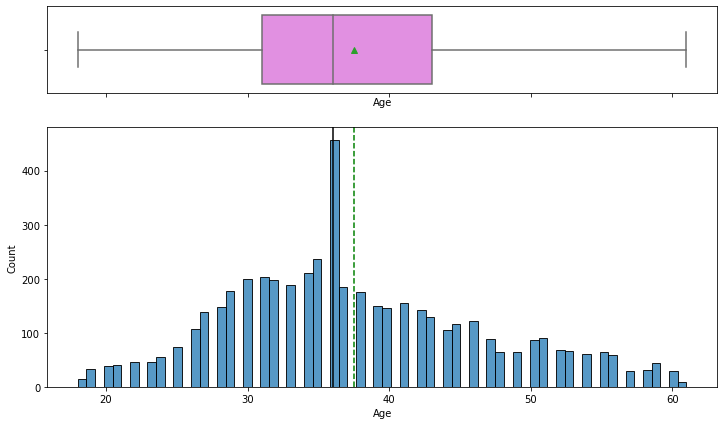

<IPython.core.display.Javascript object>

In [176]:
histogram_boxplot(data, "Age", bins=70)

#### Observation.
1. The **[Age]** of the customers are close to normally distributed with a median of 36 and average of 37.5.

### Outlier- Treatment 
## [Age] ## 

In [177]:
quartiles = np.quantile(data["Age"][data["Age"].notnull()], [0.25, 0.75])
Age_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Age_4iqr}")
outlier_Age = data.loc[np.abs(data["Age"] - data["Age"].median()) > Age_4iqr, "Age"]
outlier_Age

Q1 = 31.0, Q3 = 43.0, 4*IQR = 48.0


Series([], Name: Age, dtype: float64)

<IPython.core.display.Javascript object>

### DurationOfPitch

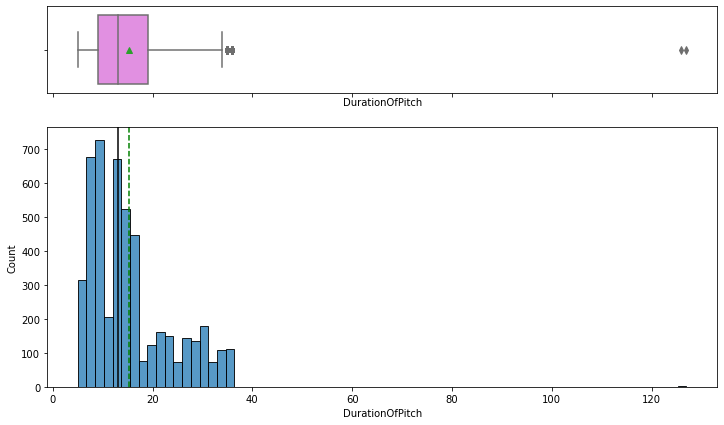

<IPython.core.display.Javascript object>

In [178]:
histogram_boxplot(data, "DurationOfPitch", bins=70)

#### Observation.
1. The distribution is right-skewed, and Average Duration of the pitch by a salesperson to the customer is 15.36 while the median is 13.

### Outlier- Treatment 
## [DurationOfPitch] ## 

In [179]:
quartiles = np.quantile(
    data["DurationOfPitch"][data["DurationOfPitch"].notnull()], [0.25, 0.75]
)
Duration_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Duration_4iqr}")
outlier_Duration = data.loc[
    np.abs(data["DurationOfPitch"] - data["DurationOfPitch"].median()) > Age_4iqr,
    "DurationOfPitch",
]
outlier_Duration

Q1 = 9.0, Q3 = 19.0, 4*IQR = 40.0


1434    126.0
3878    127.0
Name: DurationOfPitch, dtype: float64

<IPython.core.display.Javascript object>

### MonthlyIncome

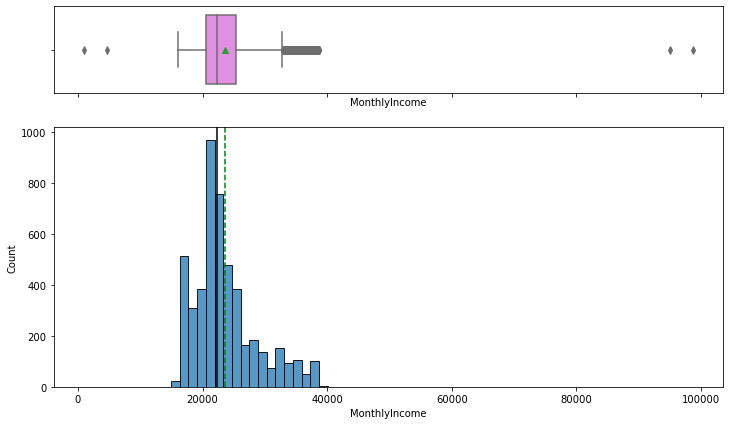

<IPython.core.display.Javascript object>

In [180]:
histogram_boxplot(data, "MonthlyIncome", bins=70)

#### Observation.
1. The distribution is right-skewed, and Average MonthlyIncome of the customer is 23559.18 while the median is 22347.

### Outlier- Treatment 
## [MonthlyIncome] ## 

In [181]:
quartiles = np.quantile(
    data["MonthlyIncome"][data["MonthlyIncome"].notnull()], [0.25, 0.75]
)
MonthlyIncome_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {MonthlyIncome_4iqr}")
outlier_MonthlyIncome = data.loc[
    np.abs(data["MonthlyIncome"] - data["MonthlyIncome"].median()) > Age_4iqr,
    "MonthlyIncome",
]
outlier_MonthlyIncome

Q1 = 20485.0, Q3 = 25424.75, 4*IQR = 19759.0


0       20993.0
1       20130.0
2       17090.0
3       17909.0
4       18468.0
         ...   
4883    26576.0
4884    21212.0
4885    31820.0
4886    20289.0
4887    24041.0
Name: MonthlyIncome, Length: 4622, dtype: float64

<IPython.core.display.Javascript object>

## UNIVARIANT ANALYSIS For the Categorical Variables

In [182]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

# TypeofContact

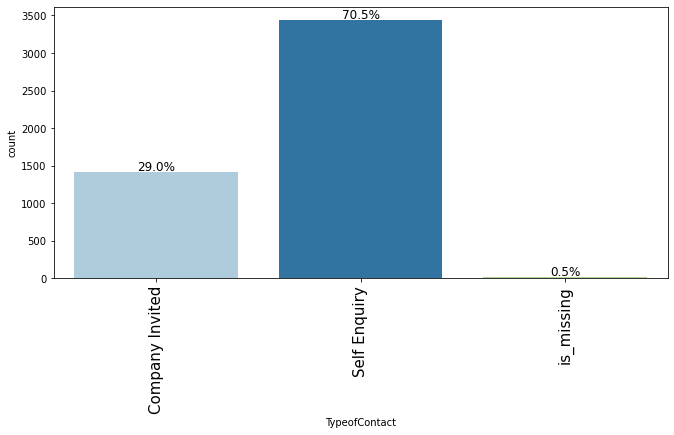

<IPython.core.display.Javascript object>

In [183]:
labeled_barplot(data, "TypeofContact", perc=True, n=10)

#### Observations.
1. The data contains 2 different methods of which the customer was contacted
2. Most customers were contacted through Self Enquiry.

# Gender

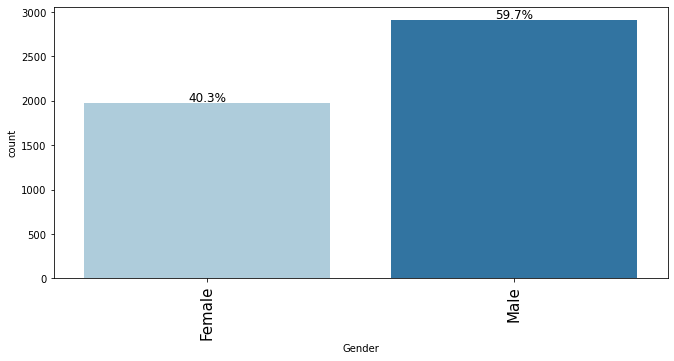

<IPython.core.display.Javascript object>

In [184]:
labeled_barplot(data, "Gender", perc=True, n=10)

#### Observations.
1. The data contains both Male and Female Customers.
2. Majority of the customers are Male.

# ProductPitched

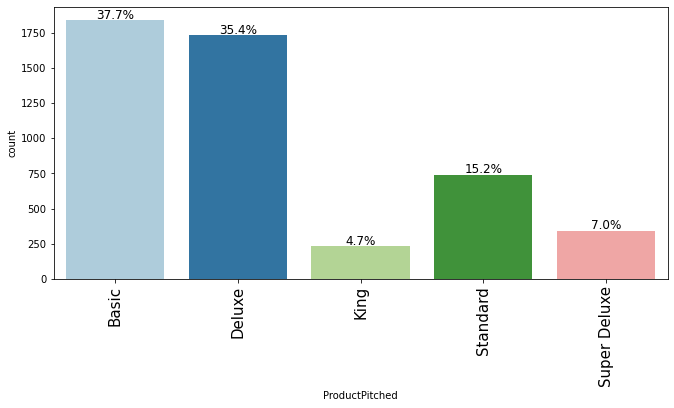

<IPython.core.display.Javascript object>

In [185]:
labeled_barplot(data, "ProductPitched", perc=True, n=10)

#### Observations.
1. The data contains 5 different Products pitched by the salesperson
2. Majority of the pitch is on the Basic.

# MaritalStatus

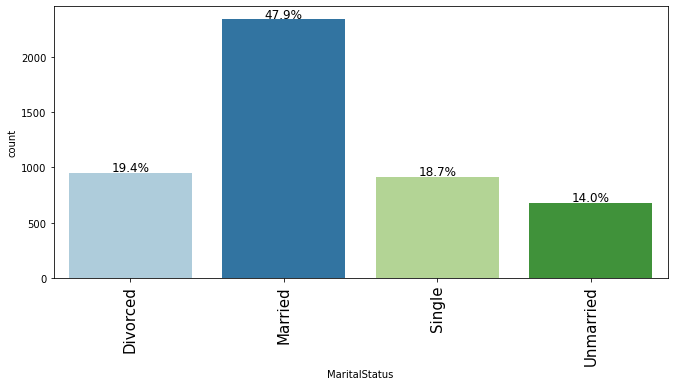

<IPython.core.display.Javascript object>

In [186]:
labeled_barplot(data, "MaritalStatus", perc=True, n=10)

#### Observations.
1. The data contains customers with 4 different marital status
2. Majority of the customers are married.

# Designation

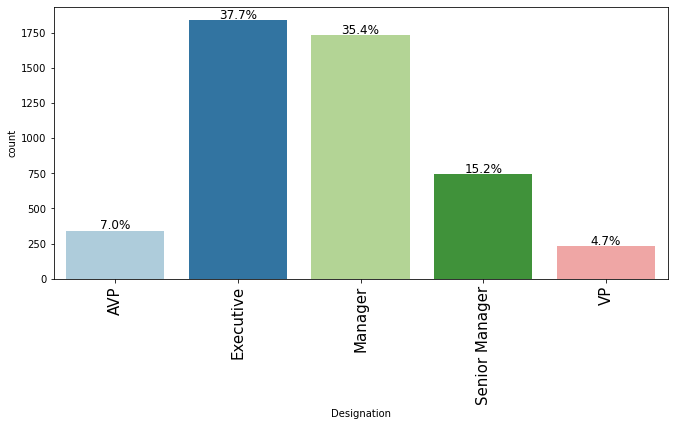

<IPython.core.display.Javascript object>

In [187]:
labeled_barplot(data, "Designation", perc=True, n=10)

#### Observations.
1. The data contains customers with 5 different Designation
2. Majority of the customers are either on the executive or managerial level.

# Occupation

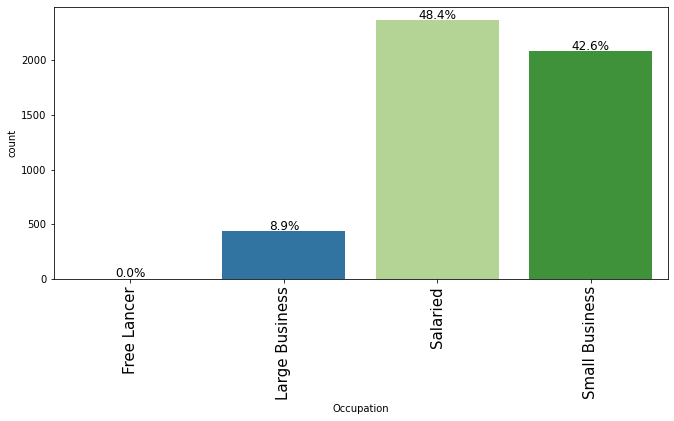

<IPython.core.display.Javascript object>

In [188]:
labeled_barplot(data, "Occupation", perc=True, n=10)

#### Observations.
1. The data contains customers with 4 different Occupations.
2. Majority of the customers either receive **[paid salary]** or own a **[small business]**

# ProdTaken

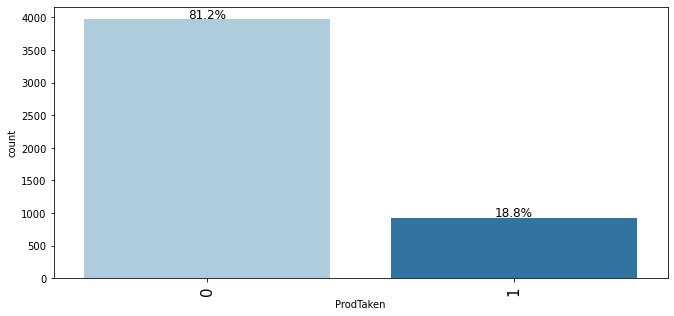

<IPython.core.display.Javascript object>

In [189]:
labeled_barplot(data, "ProdTaken", perc=True, n=10)

#### Observations.
1. The data reveals whether the customer has purchased a package or not (0: No, 1: Yes)
2. Majority of the customers did not purchase the package.

# CityTier

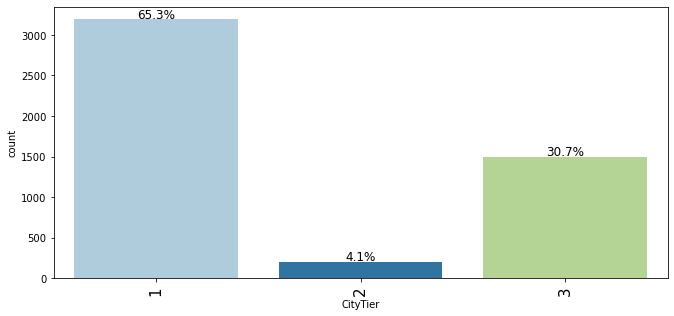

<IPython.core.display.Javascript object>

In [190]:
labeled_barplot(data, "CityTier", perc=True, n=10)

#### Observations.
1. The data contains a category of the level development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
2. The greatest category falls under Tier 1.

# NumberOfPersonVisiting

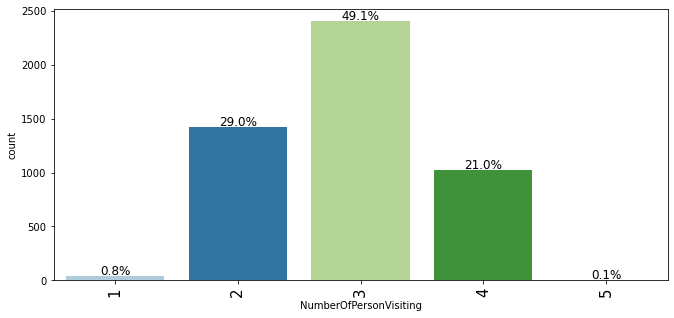

<IPython.core.display.Javascript object>

In [191]:
labeled_barplot(data, "NumberOfPersonVisiting", perc=True, n=10)

#### Observations.
1. The data contains a total number of persons planning to take the trip with the customer
2. 49% of the number of persons are planning to take the trip with the customer

# NumberOfFollowups

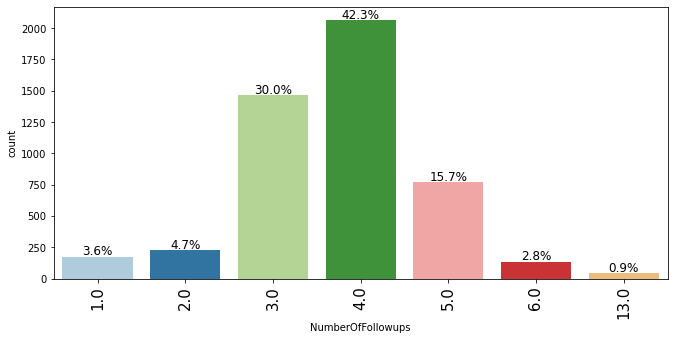

<IPython.core.display.Javascript object>

In [192]:
labeled_barplot(data, "NumberOfFollowups", perc=True, n=10)

#### Observations.
1. The data contains total number of follow-ups that has been done by the salesperson after the sales pitch.
2. Majority of the followup done by the sales person is 4.

# PreferredPropertyStar

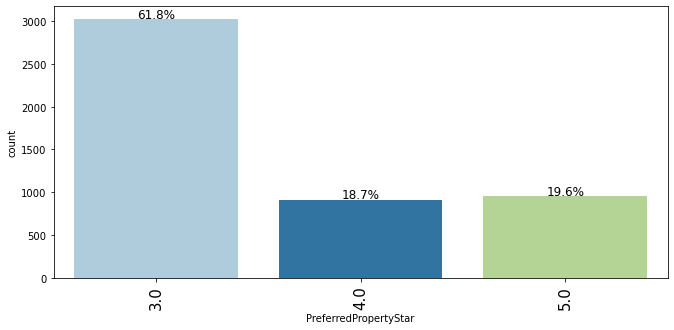

<IPython.core.display.Javascript object>

In [193]:
labeled_barplot(data, "PreferredPropertyStar", perc=True, n=10)

#### Observations.
1. The data contains customers ratings of different hotel property ratings.
2. Majority of the customers rated the hotels as 3.

# NumberOfTrips

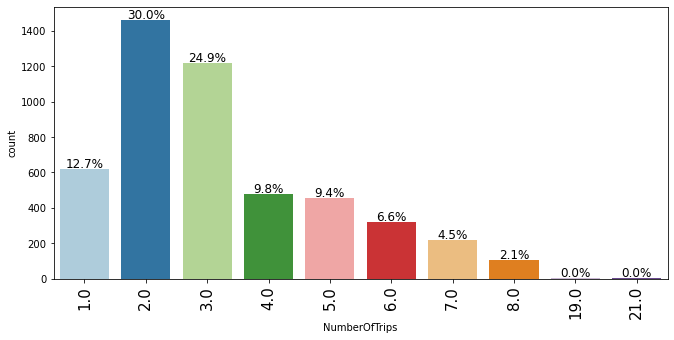

<IPython.core.display.Javascript object>

In [194]:
labeled_barplot(data, "NumberOfTrips", perc=True, n=10)

#### Observations.
1. The data contains the average number of trips in a year by customer
2. Majority of the customers (30%) travelled an average of 3 times in a year.

# Passport

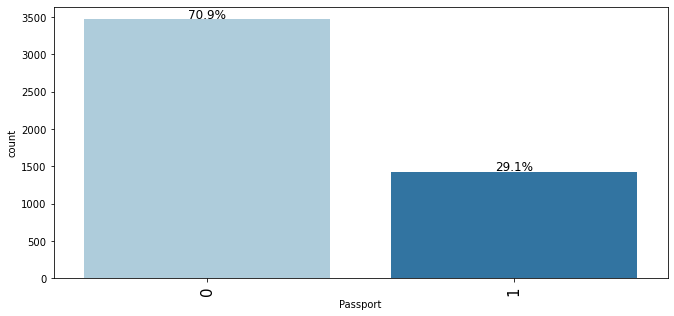

<IPython.core.display.Javascript object>

In [195]:
labeled_barplot(data, "Passport", perc=True, n=10)

#### Observations.
1. The data contains 2 classification of customer: Those that  have a passport or not (0: No, 1: Yes)
2. Majority of the customers do not have a **[Passport]** 

# PitchSatisfactionScore

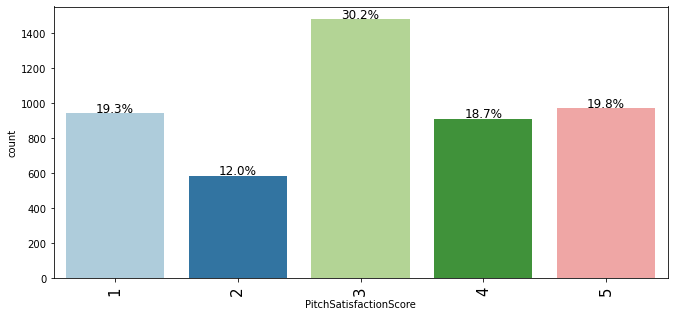

<IPython.core.display.Javascript object>

In [196]:
labeled_barplot(data, "PitchSatisfactionScore", perc=True, n=10)

#### Observations.
1. Majority of the Sales pitch (30.2%) got a satisfactory score of 3.

# OwnCar

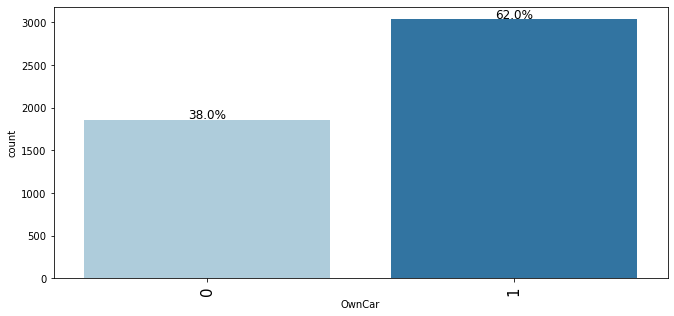

<IPython.core.display.Javascript object>

In [197]:
labeled_barplot(data, "OwnCar", perc=True, n=10)

#### Observations.
1. The data shows whether the customer owns a car or not (0: No, 1: Yes)
2. Majority of the customers  own a **[Car]**

# NumberOfChildrenVisiting

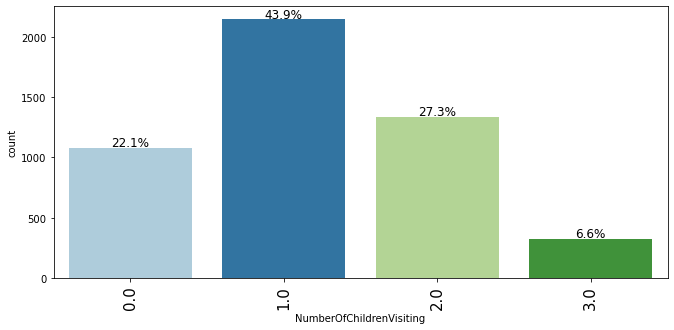

<IPython.core.display.Javascript object>

In [198]:
labeled_barplot(data, "NumberOfChildrenVisiting", perc=True, n=10)

#### Observations.
1. The data contains the total number of children with age less than 5 planning to take the trip with the customer.


# 1.17B Bivariate Analysis.

Through bivariate analysis we try to analyze two variables simultaneously. I will try to determine if there is any relationship between two variables from the dataset.

For this type of analysis, we can use use:
1. Pairplot.
2. Heatmap function in seaborn.
3. Pointplot.
3. Barplot or
4. Scatter plot.

Exploring the Relationship between numerical variables using **pair plots** and **correlation plots**.

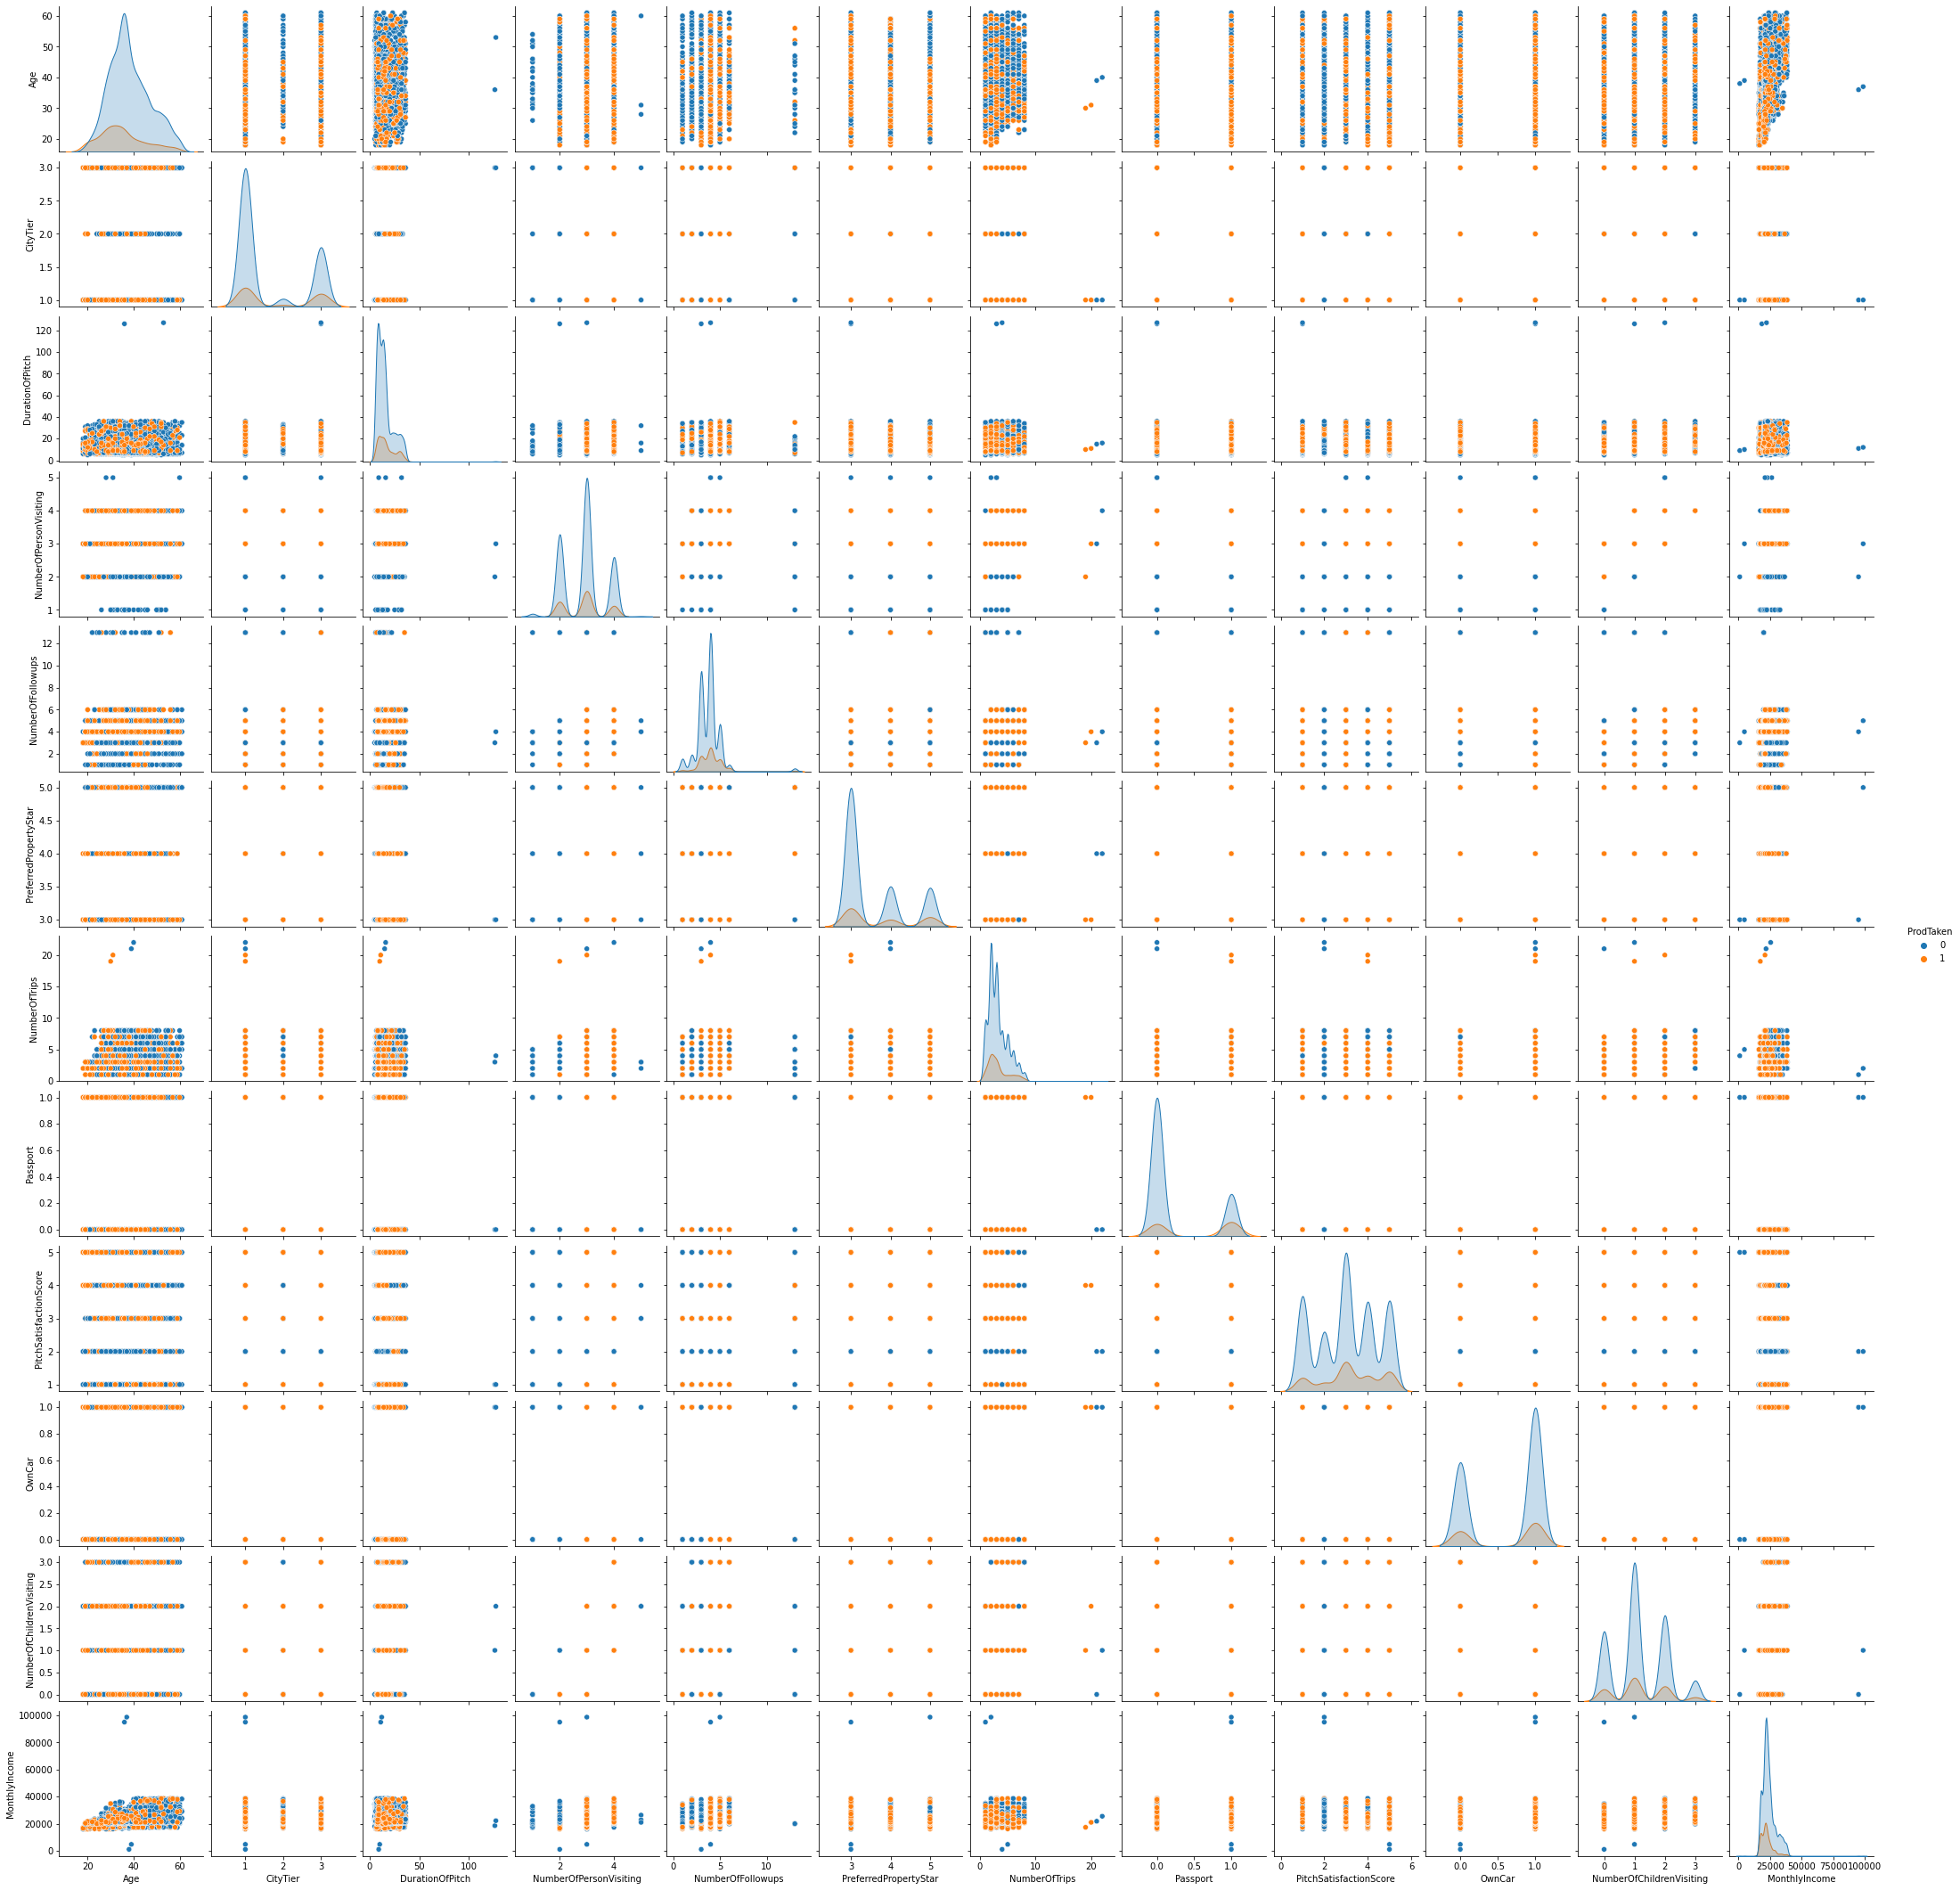

<IPython.core.display.Javascript object>

In [199]:
sns.pairplot(data=data, hue="ProdTaken")
plt.show()

In [200]:
correlation = data.corr()  # creating a 2-D Matrix with correlation plots
correlation

ProdTaken       Age  CityTier  DurationOfPitch  \
ProdTaken                  1.000000 -0.143753  0.086852         0.076481   
Age                       -0.143753  1.000000 -0.012754        -0.006261   
CityTier                   0.086852 -0.012754  1.000000         0.019445   
DurationOfPitch            0.076481 -0.006261  0.019445         1.000000   
NumberOfPersonVisiting     0.009627  0.017856 -0.001671         0.073163   
NumberOfFollowups          0.081736 -0.004896  0.037084         0.000930   
PreferredPropertyStar      0.098704 -0.015932 -0.008479        -0.005442   
NumberOfTrips              0.019709  0.174694 -0.028749         0.014153   
Passport                   0.260844  0.032398  0.001793         0.033526   
PitchSatisfactionScore     0.051394  0.017392 -0.042160        -0.002552   
OwnCar                    -0.011508  0.047356  0.003817        -0.002504   
NumberOfChildrenVisiting   0.008009  0.008486  0.000578         0.038115   
MonthlyIncome             -0.126420  0.461282  0.051790         0.003345   

                          NumberOfPersonVisiting  NumberOfFollowups  \
ProdTaken                               0.009627           0.081736   
Age                                     0.017856          -0.004896   
CityTier                               -0.001671           0.037084   
DurationOfPitch                         0.073163           0.000930   
NumberOfPersonVisiting                  1.000000           0.205334   
NumberOfFollowups                       0.205334           1.000000   
PreferredPropertyStar                   0.030519          -0.016728   
NumberOfTrips                           0.190113           0.085605   
Passport                                0.011177          -0.009124   
PitchSatisfactionScore                 -0.019581           0.011858   
OwnCar                                  0.010362           0.012197   
NumberOfChildrenVisiting                0.606321           0.185712   
MonthlyIncome                           0.198449           0.089178   

                          PreferredPropertyStar  NumberOfTrips  Passport  \
ProdTaken                              0.098704       0.019709  0.260844   
Age                                   -0.015932       0.174694  0.032398   
CityTier                              -0.008479      -0.028749  0.001793   
DurationOfPitch                       -0.005442       0.014153  0.033526   
NumberOfPersonVisiting                 0.030519       0.190113  0.011177   
NumberOfFollowups                     -0.016728       0.085605 -0.009124   
PreferredPropertyStar                  1.000000       0.009432  0.001221   
NumberOfTrips                          0.009432       1.000000  0.012926   
Passport                               0.001221       0.012926  1.000000   
PitchSatisfactionScore                -0.024019      -0.004501  0.002926   
OwnCar                                 0.013577      -0.012164 -0.022330   
NumberOfChildrenVisiting               0.031362       0.161022  0.020244   
MonthlyIncome                         -0.000508       0.115210  0.003333   

                          PitchSatisfactionScore    OwnCar  \
ProdTaken                               0.051394 -0.011508   
Age                                     0.017392  0.047356   
CityTier                               -0.042160  0.003817   
DurationOfPitch                        -0.002552 -0.002504   
NumberOfPersonVisiting                 -0.019581  0.010362   
NumberOfFollowups                       0.011858  0.012197   
PreferredPropertyStar                  -0.024019  0.013577   
NumberOfTrips                          -0.004501 -0.012164   
Passport                                0.002926 -0.022330   
PitchSatisfactionScore                  1.000000  0.068850   
OwnCar                                  0.068850  1.000000   
NumberOfChildrenVisiting                0.000251  0.025659   
MonthlyIncome                           0.028907  0.078458   

                          Number

<IPython.core.display.Javascript object>

## plotting a Heatmap

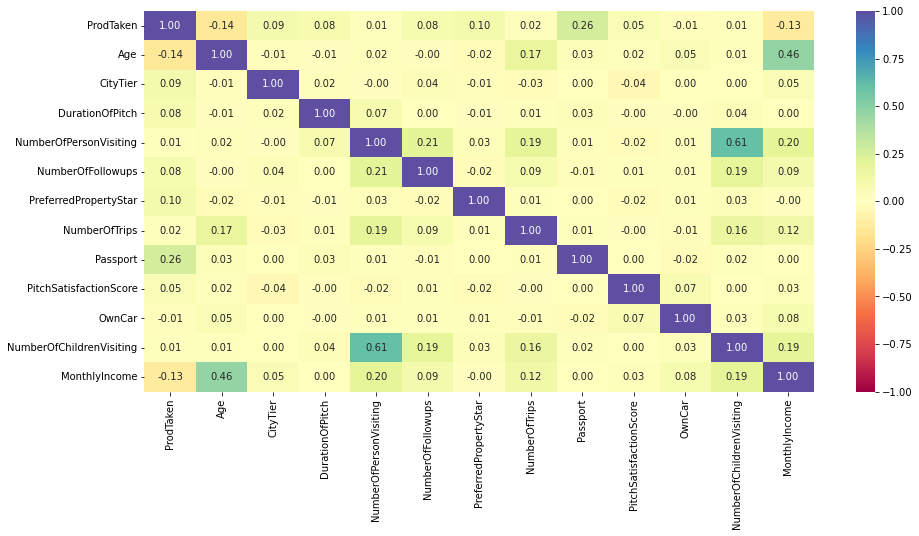

<IPython.core.display.Javascript object>

In [201]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations.
1. The **NumberOfChildrenVisiting** and the **NumberOfPersonVisiting**  are slightly highly(positive) correlate.0.61 is the correlation.
2. The **ProductTaken**  and the **Passport** have low correlation. 0.26 is the correlation.  
3. The **Age** and **MonthlyIncome** of the customers have low correlation. 0.46 is the correlation. 
4. The **Age** and **NumberOfTrips** of the customers have low correlation. 0.17 is the correlation.
5. The **NumberOfFollowups** by the salesperson and **NumberOfPersonVisiting** have low correlation. 0.21 is the correlation.
6. The **MonthlyIncome** of the customer and **NumberOfPersonVisiting** have low correlation. 0.20 is the correlation.
7. The **NumberOfTrips** in a year by customer and **MonthlyIncome** have very low correlation. 0.12 is the correlation.
8. Further investigation would be needed on this Dataset.


### Exploring the categorical features

I will check the relationship betwwen the **Target** variable with some of the **categorical** columns in my data

In [202]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
is_missing         22    3    25
------------------------------------------------------------------------------------------------------------------------


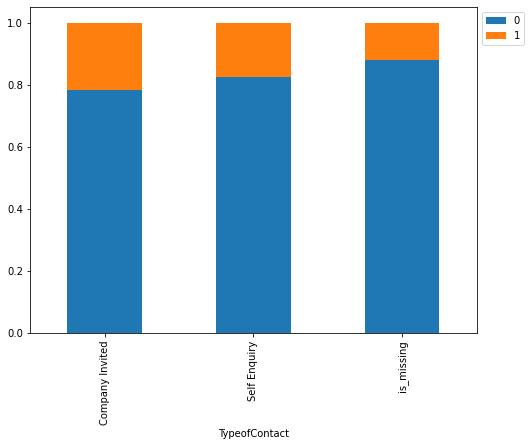

<IPython.core.display.Javascript object>

In [203]:
stacked_barplot(data, "TypeofContact", "ProdTaken")

#### Observations
The How customers were contacted through:
1. Invited or 
2. Self Inquiry.


 1. The figure above shows that across all , the number of customer that did not purchase a package is higher than those that purchased it.
 
 2. The data also shows that tmajority of the customers thhat were invited by the company purchased a package.

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


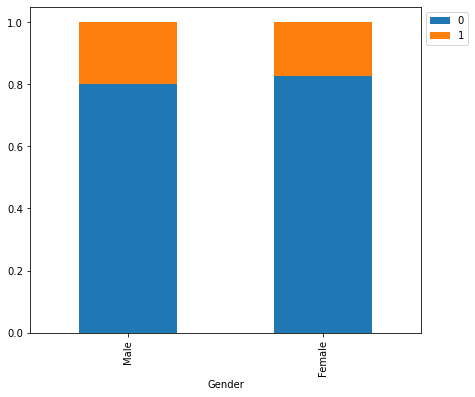

<IPython.core.display.Javascript object>

In [204]:
stacked_barplot(data, "Gender", "ProdTaken")

#### Observations
Gender of customers are both Male and Female.

 1. The figure above shows that across all Gender, the number of customers that did not purchase a package is higher than those that purchased it.
 
 2. The data also shows that majority of the customers that purchased the product are Male.


ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


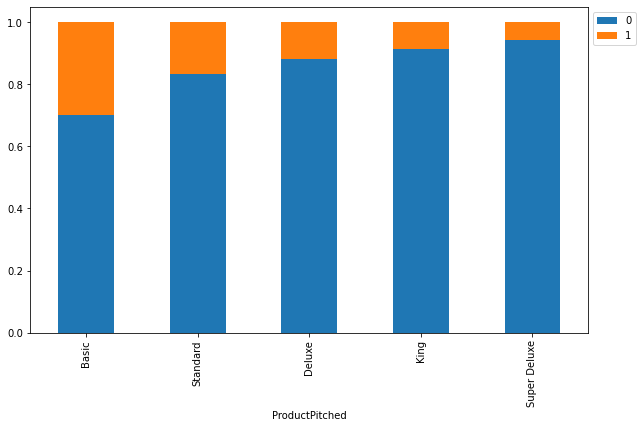

<IPython.core.display.Javascript object>

In [205]:
stacked_barplot(data, "ProductPitched", "ProdTaken")

#### Observations
1. The figure above shows that across all **[ProductPitched],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The order of Package purchased by the customer is in this order:
**BASIC > STANDARD < DELUX >  KING > SUPER DELUXE**.

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


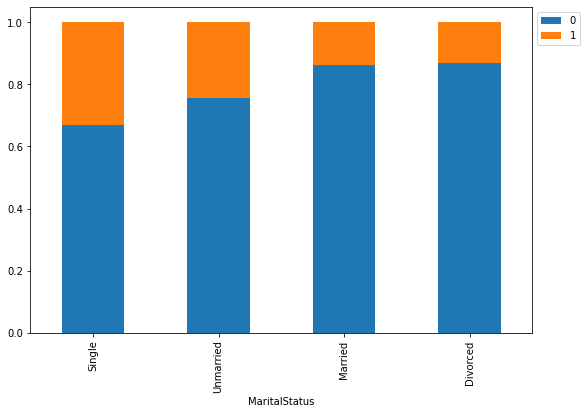

<IPython.core.display.Javascript object>

In [206]:
stacked_barplot(data, "MaritalStatus", "ProdTaken")

1. The figure above shows that across all **[MaritalStatus],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that majority of the customers that purchased the package are either **Single** or **unmarried**.

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


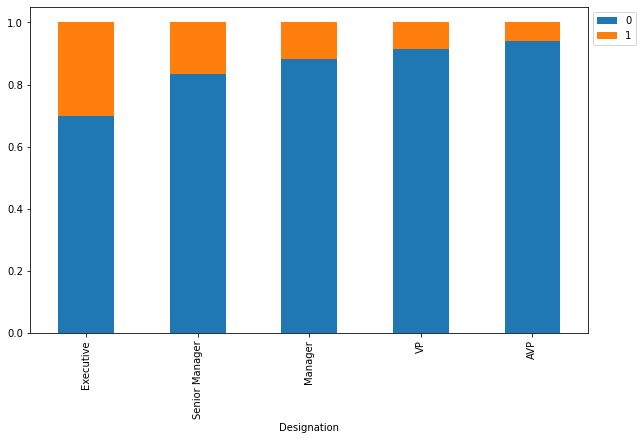

<IPython.core.display.Javascript object>

In [207]:
stacked_barplot(data, "Designation", "ProdTaken")

1. The figure above shows that across all **[Designations],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that majority of the customers that purchased the package are either **Executives** or **Senior Managers**.
3. Customers of the **Executive Level** are the major buyers of the packages.

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


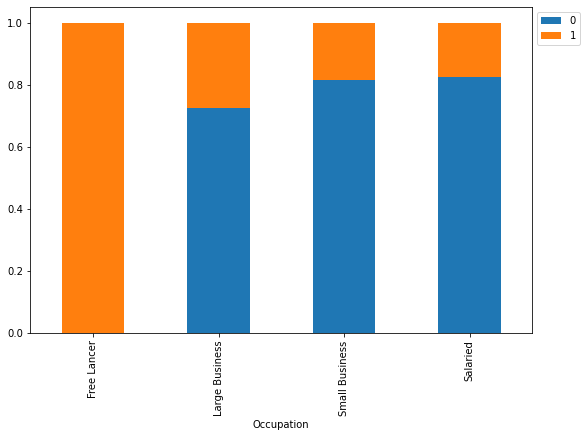

<IPython.core.display.Javascript object>

In [208]:
stacked_barplot(data, "Occupation", "ProdTaken")

1. The figure above shows that across all **[Occupation],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that majority of the customers that purchased the package are either **Freelancers** or **Large Business** owners.
3. Freelancers are the major buyers of the packages.

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


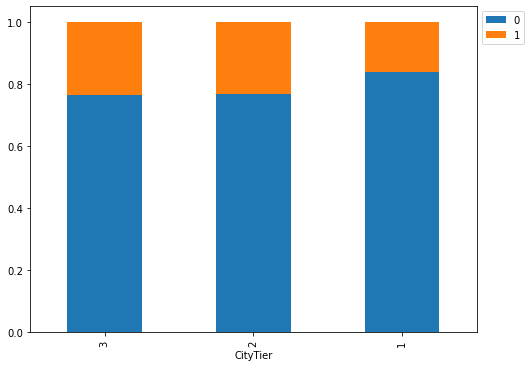

<IPython.core.display.Javascript object>

In [209]:
stacked_barplot(data, "CityTier", "ProdTaken")

1. The figure above shows that across all **[CityTier],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that majority of the customers that purchased the package are either in category **2** or **3**.


ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


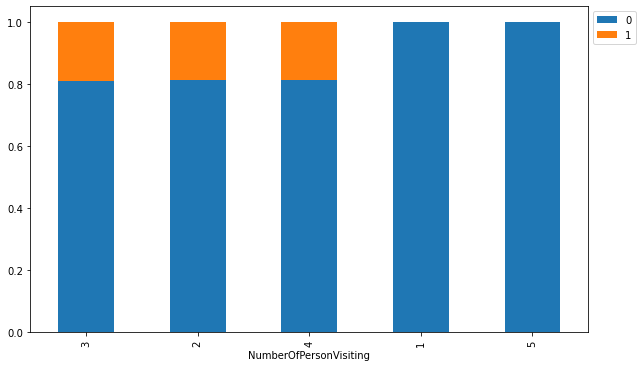

<IPython.core.display.Javascript object>

In [210]:
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken")

1. The figure above shows that across all **[NumberOfPersonVisiting],** the number of customers that did not purchase a package is higher than those that purchased it.


ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
13.0                 37    8    45
------------------------------------------------------------------------------------------------------------------------


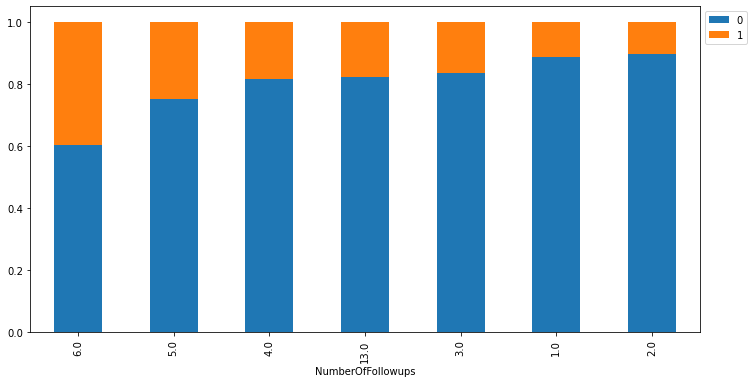

<IPython.core.display.Javascript object>

In [211]:
stacked_barplot(data, "NumberOfFollowups", "ProdTaken")

1. The figure above shows that across all **[NumberOfFollowUps],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that majority of the customers that purchased the package are in increasing order of:
**2**, **1**, **3**, **13**, **4**, **5**, **6**. 
3. Customers that were followed up 5-6 times are the major buyers of the packages.

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3.0                    2531  488  3019
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


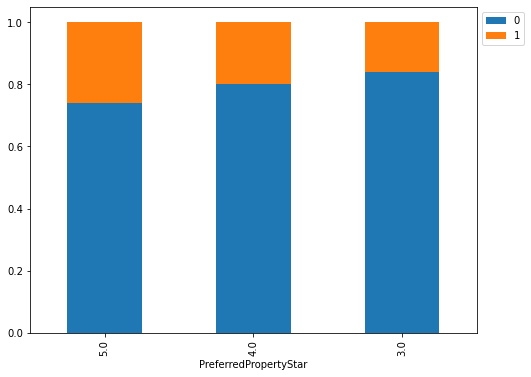

<IPython.core.display.Javascript object>

In [212]:
stacked_barplot(data, "PreferredPropertyStar", "ProdTaken")

1. The figure above shows that across all **[PreferredPropertyStar],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that the customers that use **5 star rated hotels** are the major buyers of the **packages

ProdTaken         0    1   All
NumberOfTrips                 
All            3968  920  4888
2.0            1165  299  1464
3.0             990  229  1219
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


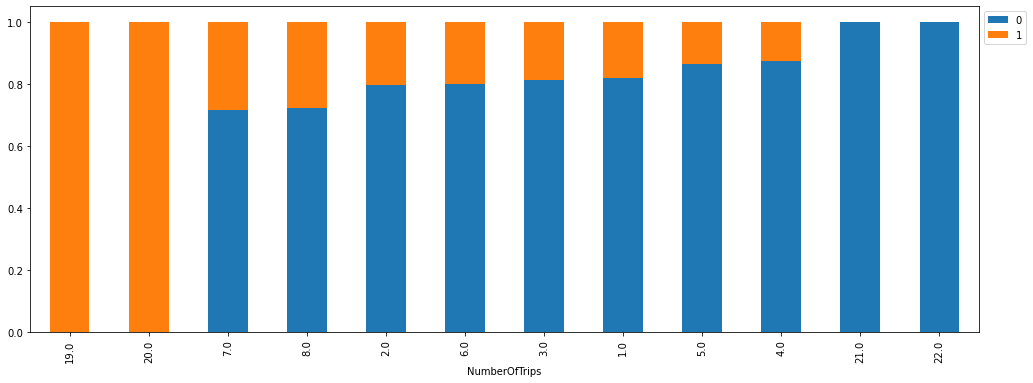

<IPython.core.display.Javascript object>

In [213]:
stacked_barplot(data, "NumberOfTrips", "ProdTaken")

1. The figure above shows that across all **[NumberOfTrips],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that customers with higher average number of trips in a year are the major buyers of the pacakages.

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


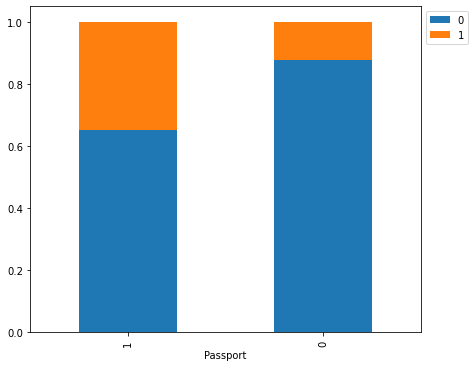

<IPython.core.display.Javascript object>

In [214]:
stacked_barplot(data, "Passport", "ProdTaken")

1. The figure above shows that across all customers, the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that customers with that own a **Passport** are the major buyers of the pacakages.

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


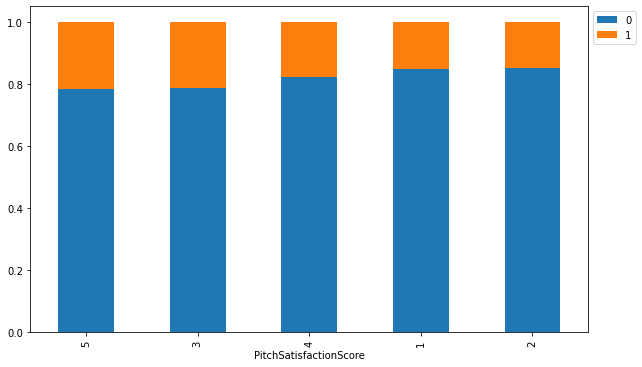

<IPython.core.display.Javascript object>

In [215]:
stacked_barplot(data, "PitchSatisfactionScore", "ProdTaken")

1. The figure above shows that across all **[NumberOfTrips],** the number of customers that did not purchase a package is higher than those that purchased it.
2. The Data shows that customers with higher average number of trips in a year are the major buyers of the pacakages.

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


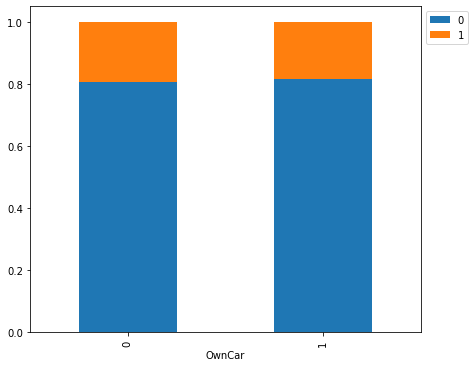

<IPython.core.display.Javascript object>

In [216]:
stacked_barplot(data, "OwnCar", "ProdTaken")

**OBSERVATION**
1. The figure above shows that across all **[car owners],** the number of customers that did not purchase a package is higher than those that purchased it.



# Required Imports for Model Evaluation

In [217]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# 1.18 STEP C-
### Data Preprocessing ***continues*** here- FEATURE ENGINEERING

#### Transformation of Variables

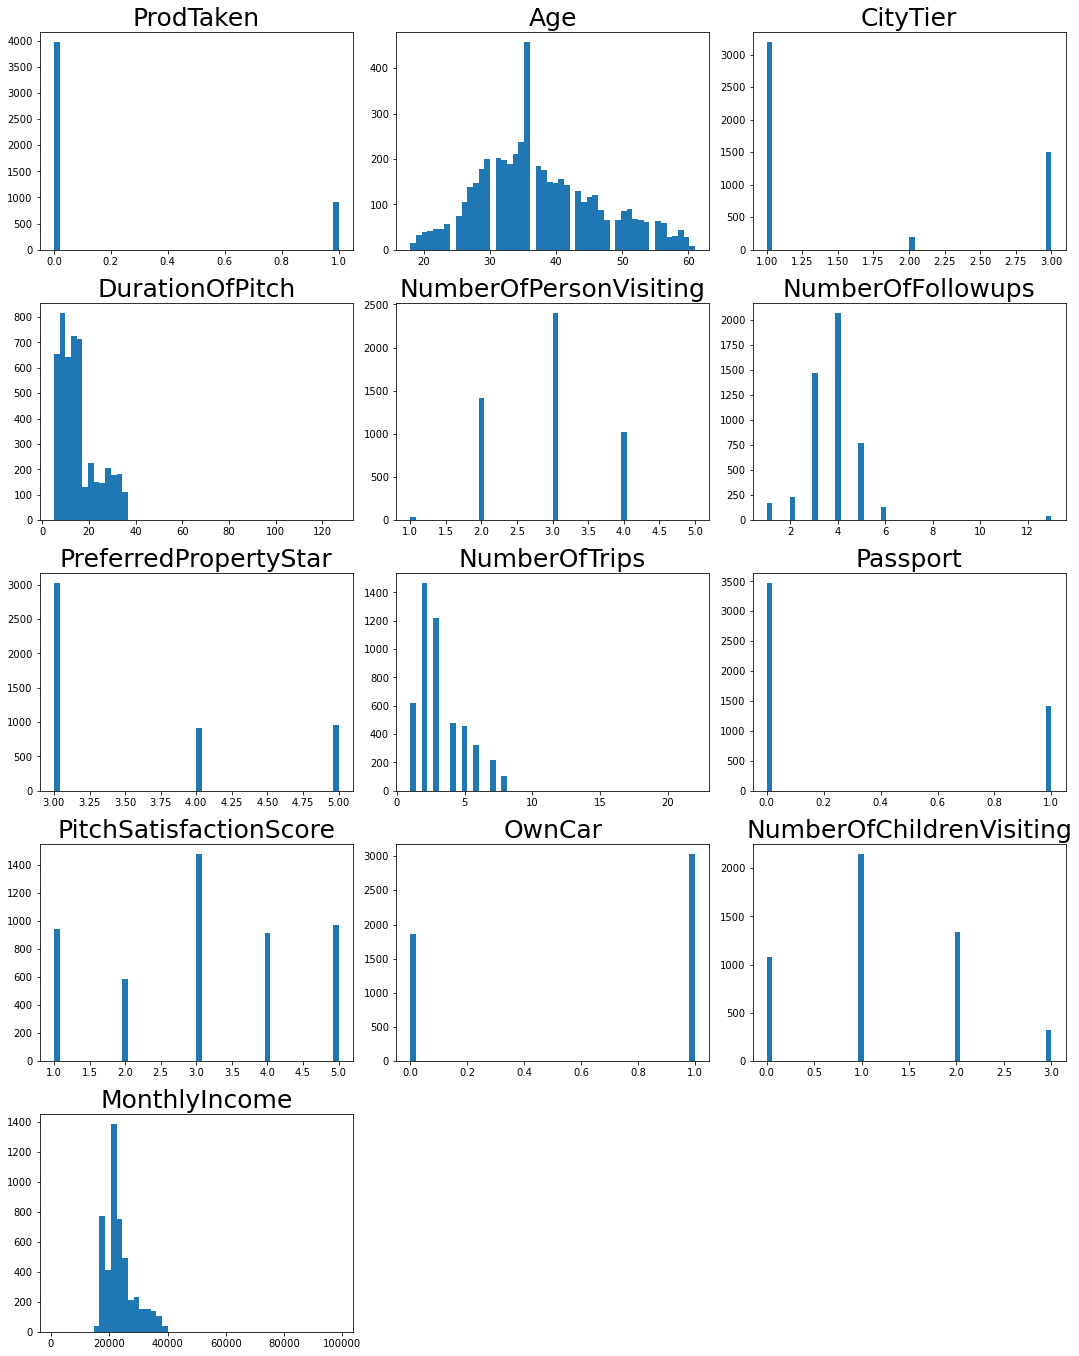

<IPython.core.display.Javascript object>

In [218]:
# list of numerical columns
dist_cols = [
    item for item in data.select_dtypes(include=np.number).columns if "tag" not in item
]

#  plotting a histogram of all Numerical columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[dist_cols[i]], bins=50)

    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

#### Observations.
1. The [**Age]** features is  close to normal distribution.
2. 
3. **[Income] and **[DurationOfPitch]** are skewed to the right.

In [219]:
n_true = len(data.loc[data["ProdTaken"] == True])
n_false = len(data.loc[data["ProdTaken"] == False])
print(
    "Number of true cases: {0} ({1:2.2f}%)".format(
        n_true, (n_true / (n_true + n_false)) * 100
    )
)
print(
    "Number of false cases: {0} ({1:2.2f}%)".format(
        n_false, (n_false / (n_true + n_false)) * 100
    )
)

Number of true cases: 920 (18.82%)
Number of false cases: 3968 (81.18%)


<IPython.core.display.Javascript object>

### Creating a copy of the dataframe.

In [220]:
df1 = data.copy()
df1


ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0             1  41.0     Self Enquiry         3              6.0   
1             0  49.0  Company Invited         1             14.0   
2             1  37.0     Self Enquiry         1              8.0   
3             0  33.0  Company Invited         1              9.0   
4             0  36.0     Self Enquiry         1              8.0   
...         ...   ...              ...       ...              ...   
4883          1  49.0     Self Enquiry         3              9.0   
4884          1  28.0  Company Invited         1             31.0   
4885          1  52.0     Self Enquiry         3             17.0   
4886          1  19.0     Self Enquiry         3             16.0   
4887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0  

[4888

<IPython.core.display.Javascript object>

### Creating dummy variables


In [221]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    df1,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

dummy_data.head()

ProdTaken   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0          1  41.0         3              6.0                       3   
1          0  49.0         1             14.0                       3   
2          1  37.0         1              8.0                       3   
3          0  33.0         1              9.0                       2   
4          0  36.0         1              8.0                       2   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0                3.0                    3.0            1.0         1   
1                4.0                    4.0            2.0         0   
2                4.0                    3.0            7.0         1   
3                3.0                    3.0            2.0         1   
4                3.0                    4.0            1.0         0   

   PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  MonthlyIncome  \
0                       2       1                       0.0        20993.0   
1                       3       1                       2.0        20130.0   
2                       3       0                       0.0        17090.0   
3                       5       1                       1.0        17909.0   
4                       5       1                       0.0        18468.0   

   TypeofContact_Self Enquiry  TypeofContact_is_missing  \
0                           1                         0   
1                           0                         0   
2                           1                         0   
3                           0                         0   
4                           1                         0   

   Occupation_Large Business  Occupation_Salaried  Occupation_Small Business  \
0                          0                    1                          0   
1                          0                    1                          0   
2                          0                    0                          0   
3                          0                    1                          0   
4                          0                    0                          1   

   Gender_Male  ProductPitched_Deluxe  ProductPitched_King  \
0            0                      1                    0   
1            1                      1                    0   
2            1                      0                    0   
3            0                      0                    0   
4            1                      0                    0   

   ProductPitched_Standard  ProductPitched_Super Deluxe  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  \
0                      0                     1                        0   
1                      0                     0                        0   
2                      0                     1                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Designation_Executive  Designation_Manager  Designation_Senior Manager  \
0                      0                    1                           0   
1                      0                    1                           0   
2                      1                    0                           0   
3                      1                    0                           0   
4                      1                    0                           0   

   Designation_VP  
0               0  
1               0  
2               0  
3               0  
4               0

<IPython.core.display.Javascript object>

In [222]:
X = dummy_data.drop("ProdTaken", axis=1)  # Features
y = dummy_data["ProdTaken"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

<IPython.core.display.Javascript object>

## 1.19 Split the data into train and test sets
We will use 70% of data for training and 30% for testing.

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function.

In [223]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(3421, 29) (1467, 29)


<IPython.core.display.Javascript object>

In [224]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3421
Number of rows in test data = 1467


<IPython.core.display.Javascript object>

In [225]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

# Model evaluation criterion

### Model can make wrong predictions

**The following functions will be used to calculate different metrics
- Accuracy, 
- Recall and
- Precision 


**I will also plot the confusion matrix.**

In [226]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [227]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    # Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Accuracy of the model
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    # Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    # Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

# 1.20 Model building- Bagging 



**We are going to build 3 ensemble models here:**
1. Bagging classifier, 
2. Random Forest, and
3. Decision Tree

- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics 
- Accuracy, 
- Precision and 
- Recall.

**Recall is the metric of interest.**

- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter



### i. Bagging Classifier

In [228]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [229]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score = get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9938614440222158
Accuracy on test set :  0.912747102931152
Recall on training set :  0.9704968944099379
Recall on test set :  0.6268115942028986
Precision on training set :  0.9968102073365231
Precision on test set :  0.8737373737373737


<IPython.core.display.Javascript object>

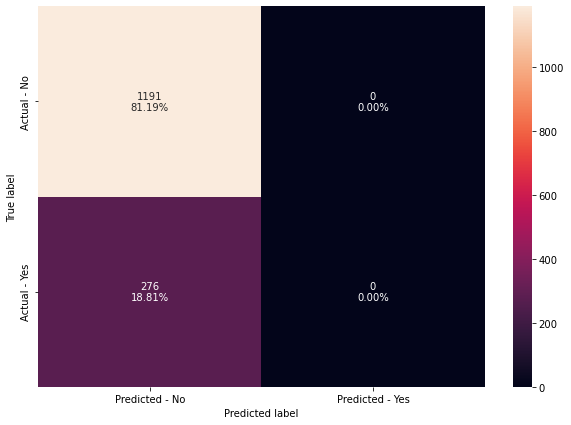

<IPython.core.display.Javascript object>

In [130]:
make_confusion_matrix(bagging_estimator, y_test)

### ii. Random Forest Classifier

In [230]:
# Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [231]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9175187457396047
Recall on training set :  1.0
Recall on test set :  0.5905797101449275
Precision on training set :  1.0
Precision on test set :  0.9532163742690059


<IPython.core.display.Javascript object>

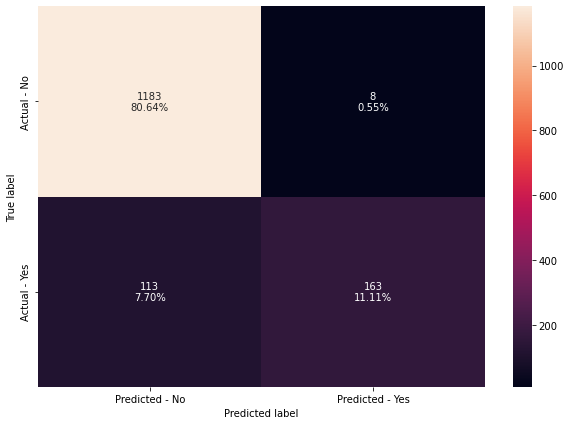

<IPython.core.display.Javascript object>

In [232]:
make_confusion_matrix(rf_estimator, y_test)

**Using default parameters:**

- Bagging classifiers as well as random forest classifier are overfitting the train data.
- The performance of both models are similar in terms of accuracy.Bagging classifier is giving better recall.

###  iii. Decision Tree

- I will builda model using the DecisionTreeClassifier function. 
- Using default 'gini' criteria to split.

If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

- class_weight is a hyperparameter for the decision tree classifier.

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

<IPython.core.display.Javascript object>

In [234]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [235]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

In [236]:
# Checking number of positives
y.sum(axis=0)

920

<IPython.core.display.Javascript object>

### Checking model performance on training set

In [237]:
print("Accuracy on training set : ", model.score(X_train, y_train))
print("Accuracy on test set : ", model.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.8786639400136332


<IPython.core.display.Javascript object>

In [238]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [239]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

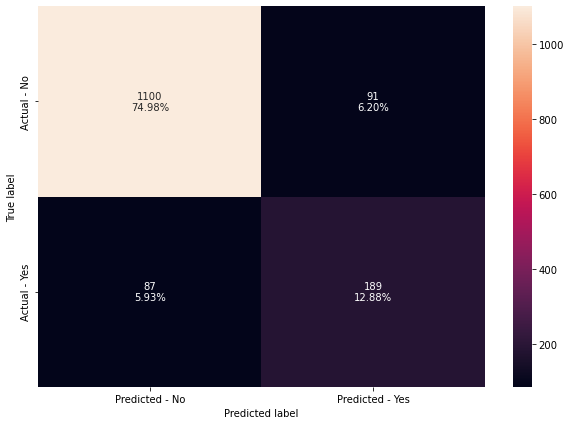

<IPython.core.display.Javascript object>

In [240]:
# Confusion matrix
from sklearn import metrics

make_confusion_matrix(model, y_test)

In [241]:
# Recall Score of training dataset
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

In [242]:
# Recall Score of testing dataset
decision_tree_perf_test = get_recall_score(model, X_test, y_test)

print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.6847826086956522


<IPython.core.display.Javascript object>

In [243]:
# List of all Column features
feature_names = list(X.columns)
print(feature_names)

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'TypeofContact_is_missing', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


<IPython.core.display.Javascript object>

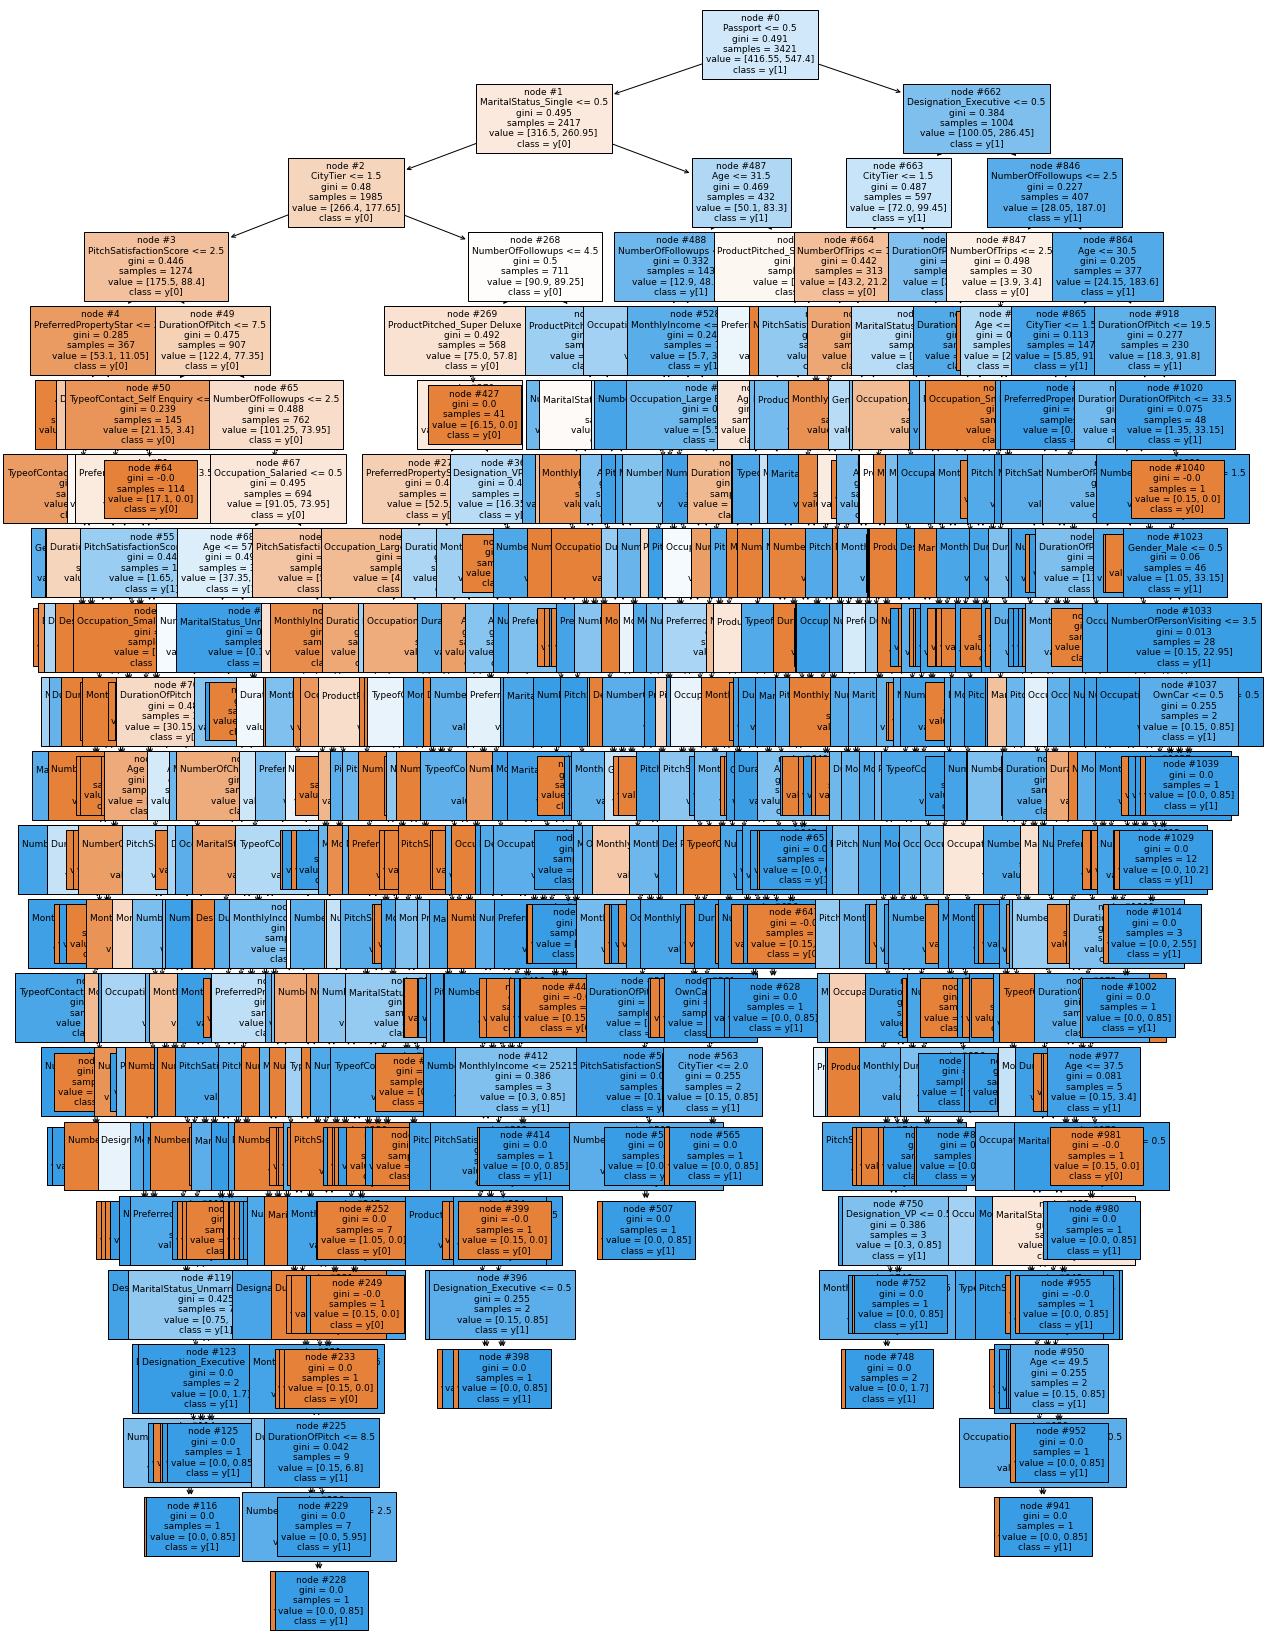

<IPython.core.display.Javascript object>

In [244]:
# plotting the decision tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [245]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
DurationOfPitch              0.152104
Age                          0.124086
MonthlyIncome                0.087480
Passport                     0.081885
NumberOfTrips                0.062870
PitchSatisfactionScore       0.061183
PreferredPropertyStar        0.050417
NumberOfFollowups            0.048133
CityTier                     0.047645
Designation_Executive        0.034341
MaritalStatus_Single         0.025281
NumberOfPersonVisiting       0.022468
MaritalStatus_Married        0.021723
Occupation_Small Business    0.021199
Occupation_Large Business    0.018556
Gender_Male                  0.017851
Occupation_Salaried          0.017847
TypeofContact_Self Enquiry   0.017062
NumberOfChildrenVisiting     0.016182
MaritalStatus_Unmarried      0.015690
ProductPitched_Super Deluxe  0.011638
Designation_VP               0.009459
OwnCar                       0.007857
ProductPitched_Deluxe        0.007799
Designation_Manager          0.005967
ProductPitch

<IPython.core.display.Javascript object>

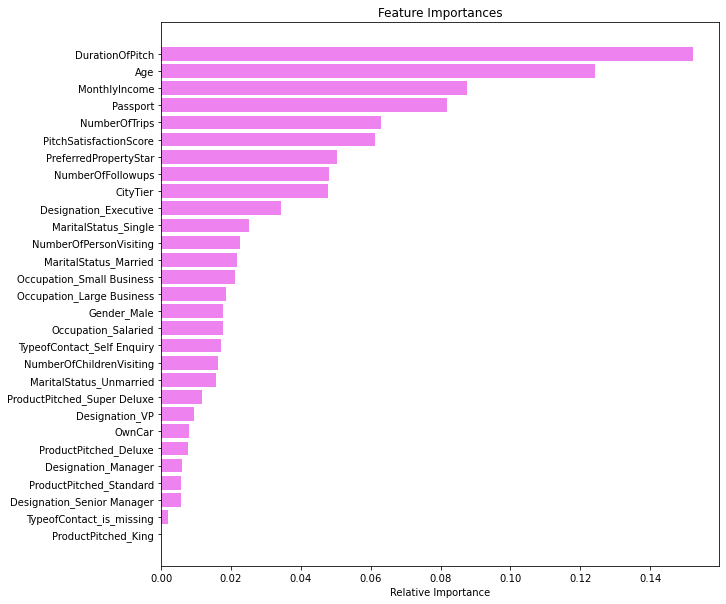

<IPython.core.display.Javascript object>

In [246]:
# Showing the features in decreasing order of importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation

1. According to the decision tree model, **DurationOfPitch** is the most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package**.
2. The 3 most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package** are:
- DurationOfPitch.

- Age.

- Monthly.

# 1.21 Model performance improvement - Bagging
#### Hyperparameter Tuning

### i. Bagging Classifier

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [247]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

<IPython.core.display.Javascript object>

**Let's check different metrics for bagging classifier with best hyperparameters and build a confusion matrix.**

In [248]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score = get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9988307512423268
Accuracy on test set :  0.9188820722563054
Recall on training set :  0.9937888198757764
Recall on test set :  0.6376811594202898
Precision on training set :  1.0
Precision on test set :  0.9025641025641026


<IPython.core.display.Javascript object>

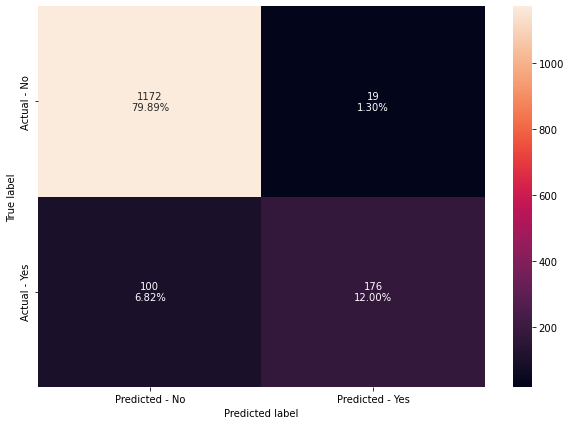

<IPython.core.display.Javascript object>

In [249]:
make_confusion_matrix(bagging_estimator_tuned, y_test)

### Insights
1. The train accuracy and recall for the bagging classifier have increased slightly after hyperparameter tuning.
2. The test recall has increased after tuning.
3. The model is overfitting the data, as train accuracy and recall are much higher than the test accuracy and test recall.
4. The confusion matrix shows that the model is better at identifying customers that did not purchase a package. 

### Now, I will use logistic regression as the base estimator for bagging classifier:
- Now, i will change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [250]:
bagging_lr = BaggingClassifier(
    base_estimator=LogisticRegression(
        solver="liblinear", random_state=1, max_iter=1000
    ),
    random_state=1,
)
bagging_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

<IPython.core.display.Javascript object>

In [251]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score = get_metrics_score(bagging_lr)

Accuracy on training set :  0.8167202572347267
Accuracy on test set :  0.8152692569870484
Recall on training set :  0.027950310559006212
Recall on test set :  0.028985507246376812
Precision on training set :  0.9473684210526315
Precision on test set :  0.7272727272727273


<IPython.core.display.Javascript object>

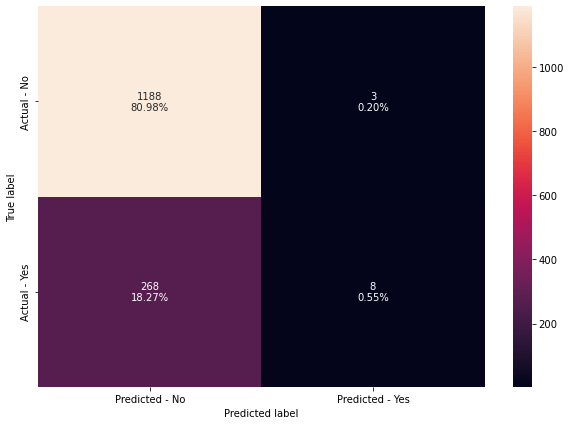

<IPython.core.display.Javascript object>

In [252]:
make_confusion_matrix(bagging_lr, y_test)

### Insights
1. Bagging classifier with logistic regression as base_estimator is not overfitting the data 
2. The test recall is very low.


### ii. Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.


In [253]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [254]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score = get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9055831628178895
Accuracy on test set :  0.8766189502385822
Recall on training set :  0.5279503105590062
Recall on test set :  0.40942028985507245
Precision on training set :  0.947075208913649
Precision on test set :  0.8625954198473282


<IPython.core.display.Javascript object>

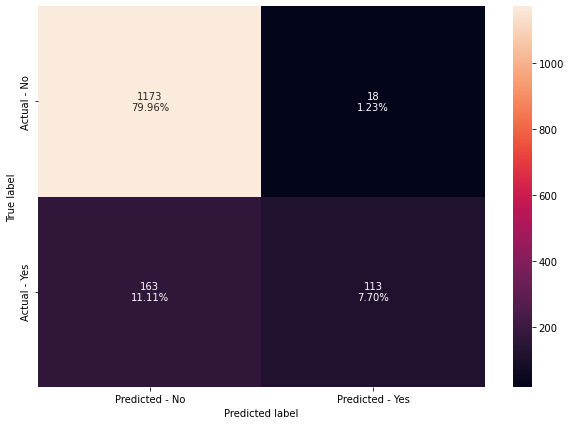

<IPython.core.display.Javascript object>

In [255]:
make_confusion_matrix(rf_estimator_tuned, y_test)

### Insights
1. The  performance of random forest has increased as compared to the random forest model with default parameters.
2. This model is slightly overfitting the data but not as much as the tuned bagging classifier.
- The test recall is still low. This means that the model is not good at identifying defaulters. This is the primary aim.

### Using class_weights for random forest:
- The model performance is not very good. This may be due to the fact that the classes are imbalanced with 70% non-Purchasers and 30% purchasers. 

- We should make the model aware that the class of interest here is ' the purchasers'.

-The`class_weights` parameter can help us acieve this. This parameter is available for random forest. This parameter is not available for the bagging classifier.

- class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- We can choose class_weights={0:0.3,1:0.7} because that is the original imbalance in our data.

In [256]:
# Choose the type of classifier.
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100, 150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=8,
                       n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [257]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score = get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.8994446068401052
Accuracy on test set :  0.8766189502385822
Recall on training set :  0.6506211180124224
Recall on test set :  0.5507246376811594
Precision on training set :  0.7788104089219331
Precision on test set :  0.7272727272727273


<IPython.core.display.Javascript object>

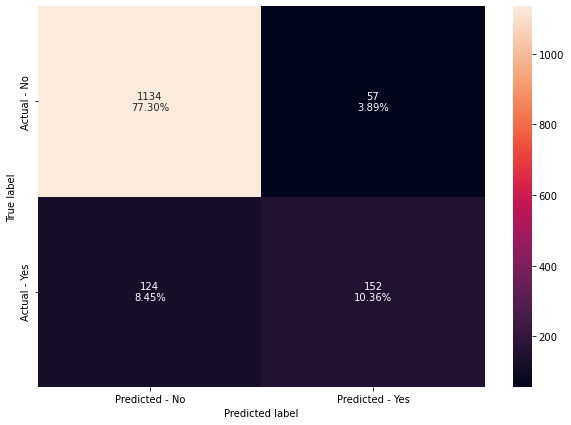

<IPython.core.display.Javascript object>

In [258]:
make_confusion_matrix(rf_estimator_weighted, y_test)

### Insights
1. The accuracy decreased a little.
2. The overfitting has also been reduced and the model is generalizing well.
3. The confusion matrix shows that the random forest model with class weights is now better at identifying the BUYERS as compared to other models.

### Checking the feature importance

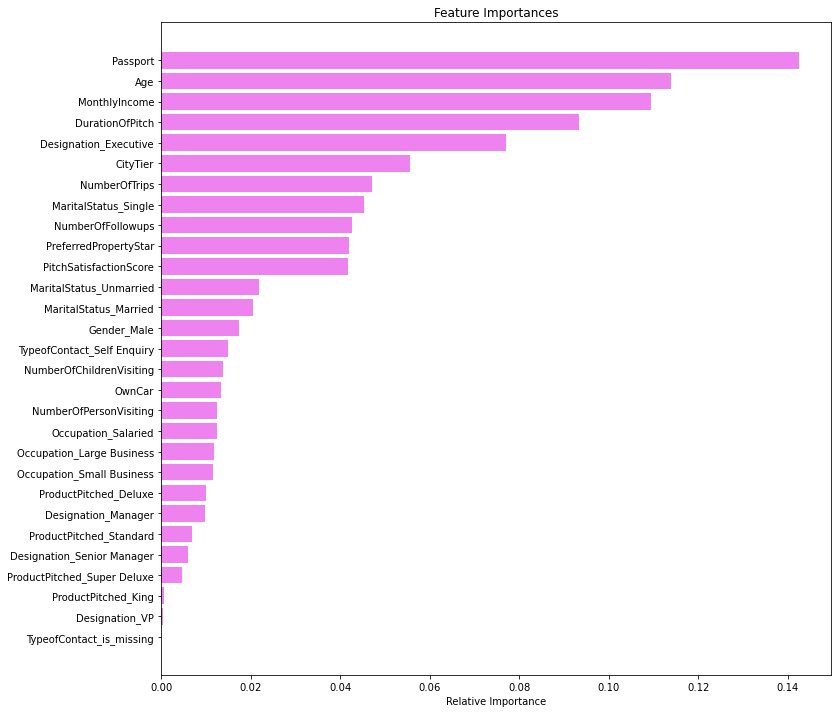

<IPython.core.display.Javascript object>

In [259]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

1. According to the above model, **Passport** is the most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package**.

2. The 3 most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package** are:
- Passport.

- Age.

- MonthlyIncome.

## iii. Decision Tree - Reducing over fitting

### Using GridSearch for Hyperparameter tuning of my Decision tree model

1. Hyperparameter tuning is also tricky. There is no direct way to calculate how a change in the hyperparameter value will reduce the loss of my model, so i will resort to experimentation. i.e using Grid search.

2.  Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

3. It is an exhaustive search that is performed on a the specific parameter values of a model.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [260]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

In [261]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Checking performance on training set

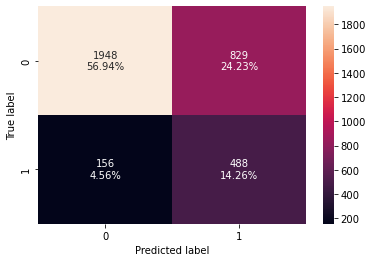

<IPython.core.display.Javascript object>

In [262]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [263]:
# Recall Score of training dataset
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.7577639751552795


<IPython.core.display.Javascript object>

### Checking performance on testing set

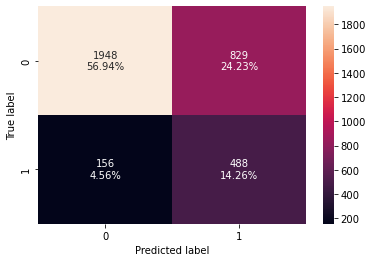

<IPython.core.display.Javascript object>

In [264]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [265]:
# Recall Score of testing dataset
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8188405797101449


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

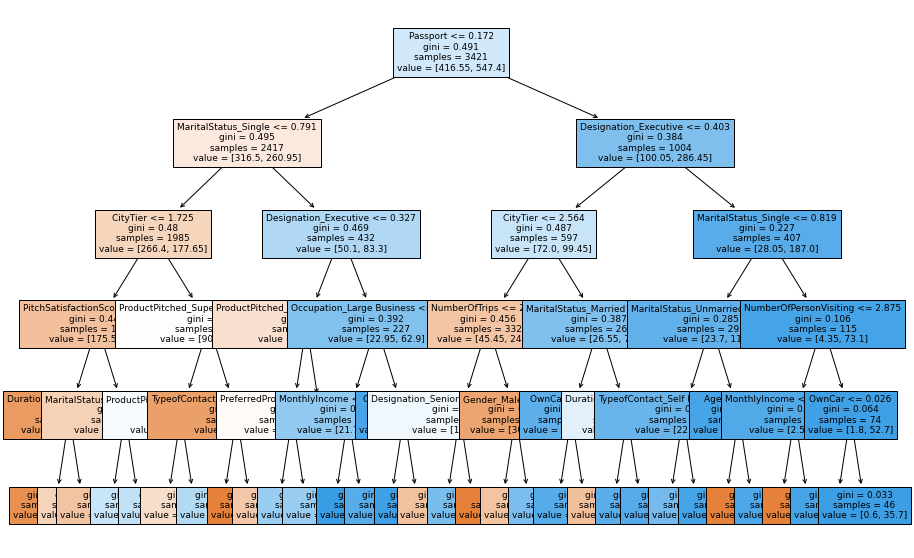

<IPython.core.display.Javascript object>

In [266]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [267]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.17
|   |--- MaritalStatus_Single <= 0.79
|   |   |--- CityTier <= 1.72
|   |   |   |--- PitchSatisfactionScore <= 2.51
|   |   |   |   |--- DurationOfPitch <= 22.42
|   |   |   |   |   |--- weights: [44.10, 5.10] class: 0
|   |   |   |   |--- DurationOfPitch >  22.42
|   |   |   |   |   |--- weights: [9.00, 5.95] class: 0
|   |   |   |--- PitchSatisfactionScore >  2.51
|   |   |   |   |--- MaritalStatus_Unmarried <= 0.04
|   |   |   |   |   |--- weights: [107.70, 56.95] class: 0
|   |   |   |   |--- MaritalStatus_Unmarried >  0.04
|   |   |   |   |   |--- weights: [14.70, 20.40] class: 1
|   |   |--- CityTier >  1.72
|   |   |   |--- ProductPitched_Super Deluxe <= 0.08
|   |   |   |   |--- ProductPitched_Deluxe <= 0.17
|   |   |   |   |   |--- weights: [36.30, 52.70] class: 1
|   |   |   |   |--- ProductPitched_Deluxe >  0.17
|   |   |   |   |   |--- weights: [47.55, 34.85] class: 0
|   |   |   |--- ProductPitched_Super Deluxe >  0.08
|   |   |   |   |--- TypeofConta

<IPython.core.display.Javascript object>

In [268]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                  Imp
Passport                     0.294710
Designation_Executive        0.164587
CityTier                     0.136068
MaritalStatus_Single         0.088733
DurationOfPitch              0.049393
PitchSatisfactionScore       0.034145
ProductPitched_Super Deluxe  0.031918
MaritalStatus_Married        0.031202
MaritalStatus_Unmarried      0.029856
NumberOfTrips                0.023737
Designation_Senior Manager   0.020379
ProductPitched_Deluxe        0.018637
Gender_Male                  0.016555
PreferredPropertyStar        0.015183
TypeofContact_Self Enquiry   0.014986
MonthlyIncome                0.012125
Occupation_Large Business    0.010584
OwnCar                       0.003696
Age                          0.002008
NumberOfPersonVisiting       0.001498
ProductPitched_King          0.000000
ProductPitched_Standard      0.000000
Occupation_Small Business    0.000000
Occupation_Salaried          0.000000
TypeofContact_is_missing     0.000000
NumberOfChil

<IPython.core.display.Javascript object>

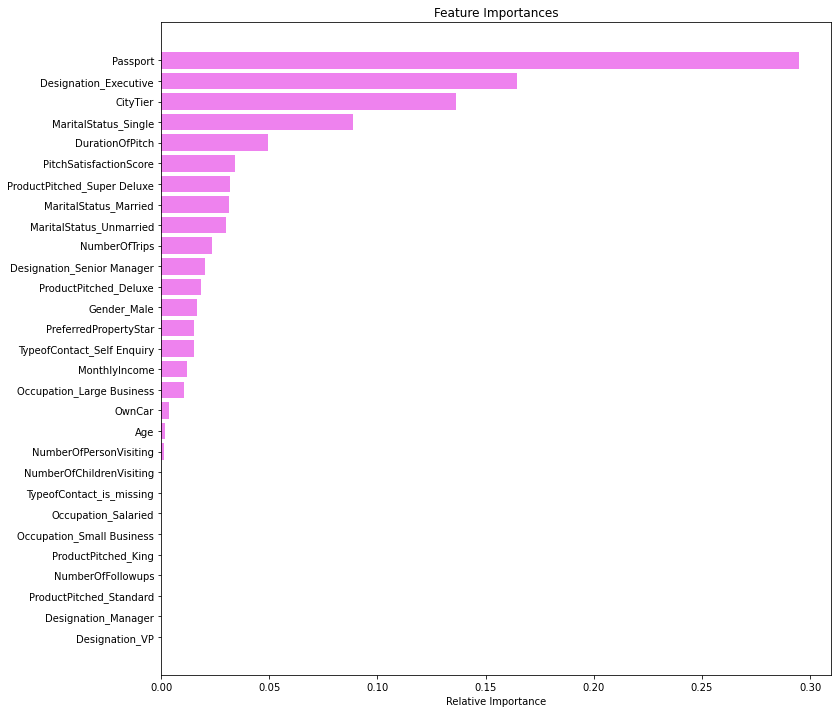

<IPython.core.display.Javascript object>

In [269]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

1. According to the tuned decision tree, **Passport** is the most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package**.
2. The 3 most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package** are:
- Passport.

- Designation-Executive.

- CityTier.



## Cost Complexity Pruning

The DecisionTreeClassifier provides parameters such as:

1. min_samples_leaf and 
2. max_depth to prevent a tree from overfiting. 

Cost complexity pruning help to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here i only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [270]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [271]:
pd.DataFrame(path)

ccp_alphas    impurities
0    0.000000e+00 -5.091282e-16
1    2.073138e-19 -5.089208e-16
2    3.455230e-19 -5.085753e-16
3    3.455230e-19 -5.082298e-16
4    5.528368e-19 -5.076770e-16
..            ...           ...
325  6.439057e-03  4.098666e-01
326  1.071468e-02  4.205813e-01
327  1.342799e-02  4.340093e-01
328  1.658969e-02  4.505990e-01
329  4.018787e-02  4.907868e-01

[330 rows x 2 columns]

<IPython.core.display.Javascript object>

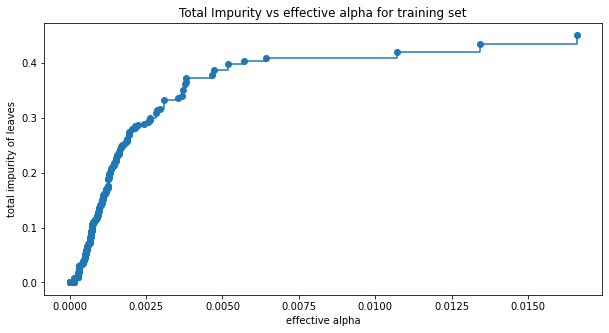

<IPython.core.display.Javascript object>

In [272]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, I train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [273]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04018787439800897


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

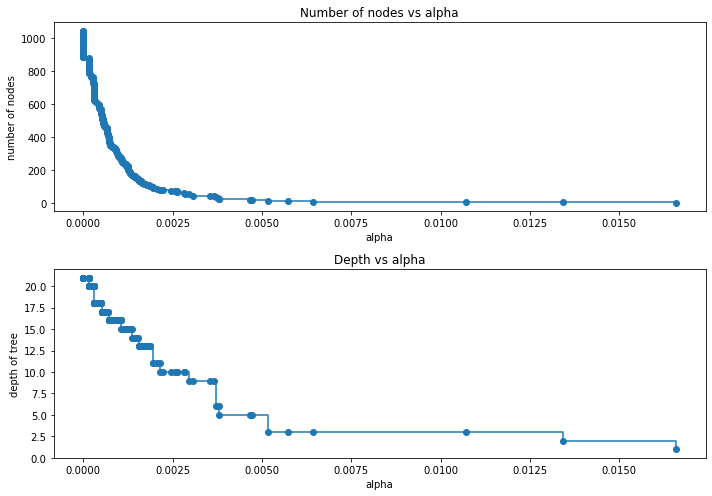

<IPython.core.display.Javascript object>

In [274]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [275]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [276]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [277]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

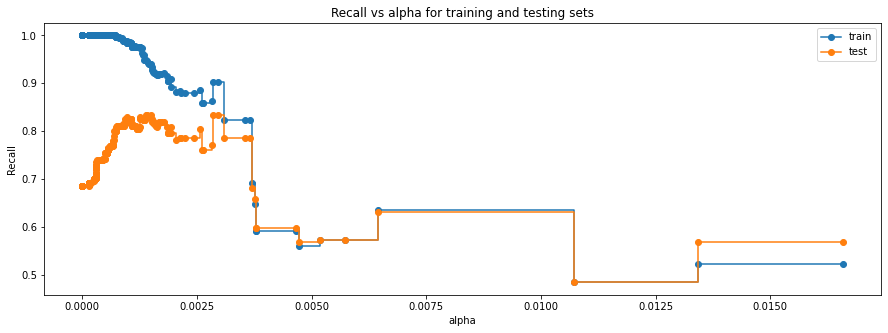

<IPython.core.display.Javascript object>

In [278]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [279]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0013991772882723818,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [280]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0013991772882723818,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

# checking performance on training set

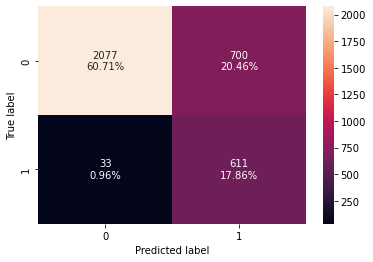

<IPython.core.display.Javascript object>

In [281]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [282]:
# Recall Score of training dataset
get_recall_score(best_model, X_train, y_train)



0.9487577639751553

<IPython.core.display.Javascript object>

# checking performance on test set

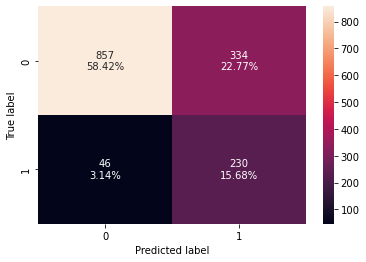

<IPython.core.display.Javascript object>

In [283]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [285]:
# Recall Score of test dataset
get_recall_score(best_model, X_test, y_test)


0.8333333333333334

<IPython.core.display.Javascript object>

# Visualizing the Decision Tree

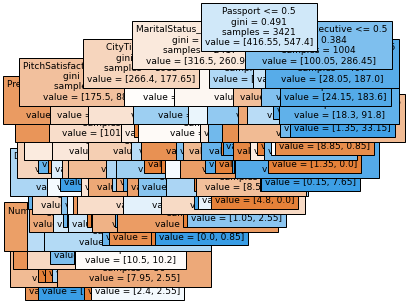

<IPython.core.display.Javascript object>

In [286]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Checking performance on the training set

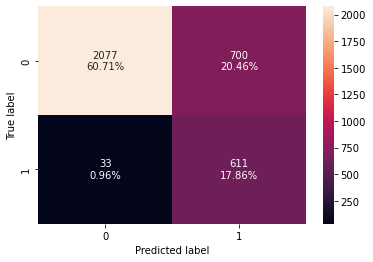

<IPython.core.display.Javascript object>

In [287]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [288]:
decision_tree_postpruned_perf_train = get_recall_score(best_model, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9487577639751553


<IPython.core.display.Javascript object>

This model might be giving the highest recall but this might not be enough for the evaluation

### Creating model with 0.002 ccp_alpha

In [289]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

## Checking performance on the test set

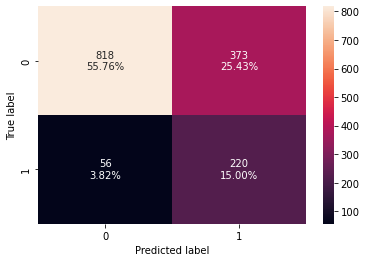

<IPython.core.display.Javascript object>

In [290]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [291]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)


Recall Score: 0.7971014492753623


<IPython.core.display.Javascript object>

**Observation**

1. The results have improved from the initial model.
2. The performance is comparable to the hyperparameter tuned model.


## Visualizing the Decision Tree

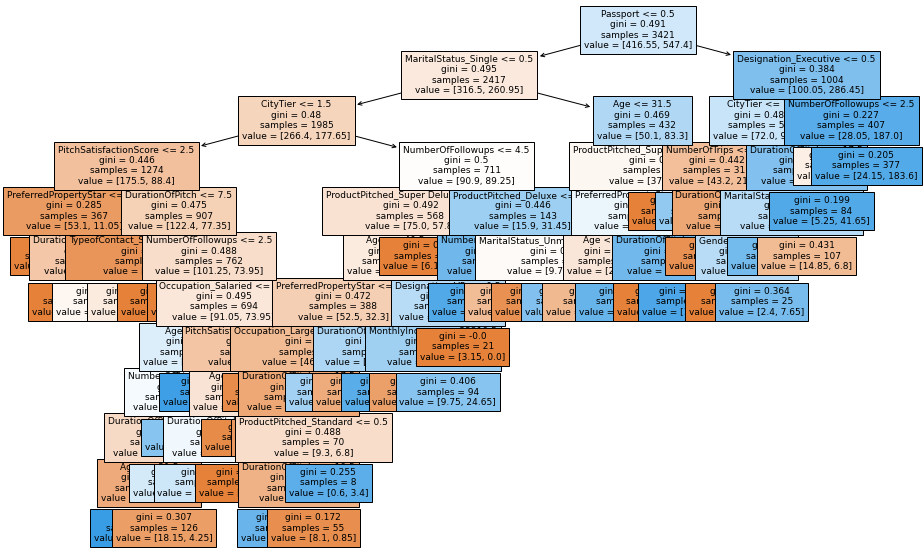

<IPython.core.display.Javascript object>

In [292]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [293]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- MaritalStatus_Single <= 0.50
|   |   |--- CityTier <= 1.50
|   |   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |   |--- PreferredPropertyStar <= 3.50
|   |   |   |   |   |--- weights: [34.80, 0.85] class: 0
|   |   |   |   |--- PreferredPropertyStar >  3.50
|   |   |   |   |   |--- DurationOfPitch <= 12.50
|   |   |   |   |   |   |--- weights: [7.35, 0.00] class: 0
|   |   |   |   |   |--- DurationOfPitch >  12.50
|   |   |   |   |   |   |--- weights: [10.95, 10.20] class: 0
|   |   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |   |--- DurationOfPitch <= 7.50
|   |   |   |   |   |--- TypeofContact_Self Enquiry <= 0.50
|   |   |   |   |   |   |--- weights: [4.05, 3.40] class: 0
|   |   |   |   |   |--- TypeofContact_Self Enquiry >  0.50
|   |   |   |   |   |   |--- weights: [17.10, 0.00] class: 0
|   |   |   |   |--- DurationOfPitch >  7.50
|   |   |   |   |   |--- NumberOfFollowups <= 2.50
|   |   |   |   |   |   |--- weights: [10.20, 0.00]

<IPython.core.display.Javascript object>

In [294]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Passport                     0.185455
DurationOfPitch              0.146520
Age                          0.106720
CityTier                     0.088354
Designation_Executive        0.076556
MaritalStatus_Single         0.049445
NumberOfTrips                0.049422
NumberOfFollowups            0.047792
PreferredPropertyStar        0.043405
PitchSatisfactionScore       0.040269
MaritalStatus_Married        0.028018
ProductPitched_Super Deluxe  0.026357
Occupation_Large Business    0.017634
MaritalStatus_Unmarried      0.016484
Occupation_Salaried          0.015303
Designation_VP               0.012109
Gender_Male                  0.011284
TypeofContact_Self Enquiry   0.010348
MonthlyIncome                0.009854
ProductPitched_Deluxe        0.009352
ProductPitched_Standard      0.009319
TypeofContact_is_missing     0.000000
Occupation_Small Business    0.000000
ProductPitched_King          0.000000
NumberOfChildrenVisiting     0.000000
OwnCar      

<IPython.core.display.Javascript object>

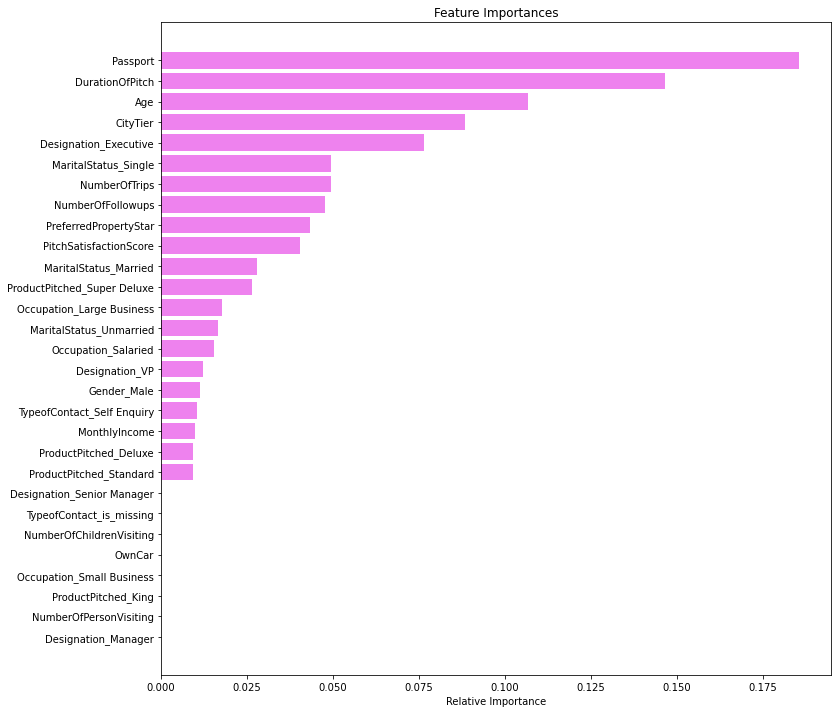

<IPython.core.display.Javascript object>

In [295]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

1. According to the tuned decision tree, **Passport** is the most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package**.
2. The 3 most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package** are:
- Passport.

- DurationOfPitch.

- Age.



### Comparing all the decision tree models

In [296]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                1.000000
1                0.757764
2                0.948758

<IPython.core.display.Javascript object>

In [297]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.684783
1               0.818841
2               0.797101

<IPython.core.display.Javascript object>

**Observation**

1. Decision tree model with pre-pruning has given the best recall score on training data.
2. The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

# 1.22 Comparing all models till now

In [298]:
# defining list of models
models = [
    bagging_estimator,
    bagging_estimator_tuned,
    bagging_lr,
    rf_estimator,
    rf_estimator_tuned,
    rf_estimator_weighted,
]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

<IPython.core.display.Javascript object>

In [299]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Bagging classifier with default parameters",
            "Tuned Bagging Classifier",
            "Bagging classifier with base_estimator=LR",
            "Random Forest with deafult parameters",
            "Tuned Random Forest Classifier",
            "Random Forest with class_weights",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0  Bagging classifier with default parameters            0.99           0.91   
1                    Tuned Bagging Classifier            1.00           0.92   
2   Bagging classifier with base_estimator=LR            0.82           0.82   
3       Random Forest with deafult parameters            1.00           0.92   
4              Tuned Random Forest Classifier            0.91           0.88   
5            Random Forest with class_weights            0.90           0.88   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          0.97         0.63             1.00            0.87  
1          0.99         0.64             1.00            0.90  
2          0.03         0.03             0.95            0.73  
3          1.00         0.59             1.00            0.95  
4          0.53         0.41             0.95            0.86  
5          0.65         0.55             0.78            0.73

<IPython.core.display.Javascript object>

### KINDLY NOTE:
- Hyperparameter tuning is tricky and exhaustive in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model until you try those hyperparameters.
- The final results depend on the parameters used/checked using GridSearchCV.
- There may be yet better parameters which may result in a better accuracy and recall.

# 1.23 Model building - Boosting

### Import Libraries

In [319]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

!pip install xgboost
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

In [337]:
### Creating a copy of the dataframe.
df2 = data.copy()
df2


ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0             1  41.0     Self Enquiry         3              6.0   
1             0  49.0  Company Invited         1             14.0   
2             1  37.0     Self Enquiry         1              8.0   
3             0  33.0  Company Invited         1              9.0   
4             0  36.0     Self Enquiry         1              8.0   
...         ...   ...              ...       ...              ...   
4883          1  49.0     Self Enquiry         3              9.0   
4884          1  28.0  Company Invited         1             31.0   
4885          1  52.0     Self Enquiry         3             17.0   
4886          1  19.0     Self Enquiry         3             16.0   
4887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0  

[4888

<IPython.core.display.Javascript object>

### Creating dummy variables


In [338]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    df2,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

dummy_data.head()

ProdTaken   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0          1  41.0         3              6.0                       3   
1          0  49.0         1             14.0                       3   
2          1  37.0         1              8.0                       3   
3          0  33.0         1              9.0                       2   
4          0  36.0         1              8.0                       2   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0                3.0                    3.0            1.0         1   
1                4.0                    4.0            2.0         0   
2                4.0                    3.0            7.0         1   
3                3.0                    3.0            2.0         1   
4                3.0                    4.0            1.0         0   

   PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  MonthlyIncome  \
0                       2       1                       0.0        20993.0   
1                       3       1                       2.0        20130.0   
2                       3       0                       0.0        17090.0   
3                       5       1                       1.0        17909.0   
4                       5       1                       0.0        18468.0   

   TypeofContact_Self Enquiry  TypeofContact_is_missing  \
0                           1                         0   
1                           0                         0   
2                           1                         0   
3                           0                         0   
4                           1                         0   

   Occupation_Large Business  Occupation_Salaried  Occupation_Small Business  \
0                          0                    1                          0   
1                          0                    1                          0   
2                          0                    0                          0   
3                          0                    1                          0   
4                          0                    0                          1   

   Gender_Male  ProductPitched_Deluxe  ProductPitched_King  \
0            0                      1                    0   
1            1                      1                    0   
2            1                      0                    0   
3            0                      0                    0   
4            1                      0                    0   

   ProductPitched_Standard  ProductPitched_Super Deluxe  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  \
0                      0                     1                        0   
1                      0                     0                        0   
2                      0                     1                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Designation_Executive  Designation_Manager  Designation_Senior Manager  \
0                      0                    1                           0   
1                      0                    1                           0   
2                      1                    0                           0   
3                      1                    0                           0   
4                      1                    0                           0   

   Designation_VP  
0               0  
1               0  
2               0  
3               0  
4               0

<IPython.core.display.Javascript object>

## 1.24 Split the data into train and test sets

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function.

In [344]:
X = dummy_data.drop("ProdTaken", axis=1)  # Features
y = dummy_data["ProdTaken"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

<IPython.core.display.Javascript object>

In [345]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [346]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [347]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

### Steps in Building the model
- I will build 3 ensemble models here
1. AdaBoost Classifier,
2. Gradient Boosting Classifier and
3. XGBoost Classifier.

- First, I will build these models with default parameters and then use hyperparameter tuning to optimize the model performance.

- Then, i will calculate all three metrics:
1. Accuracy,
2. Precision and
3. Recall

**The metric of interest here is recall.**

- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### i. AdaBoost Classifier

In [348]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [349]:
# Using above defined function to get accuracy, recall and precision on train and test set
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.847413037123648
Accuracy on test set :  0.8507157464212679
Recall on training set :  0.32142857142857145
Recall on test set :  0.3333333333333333
Precision on training set :  0.708904109589041
Precision on test set :  0.7244094488188977


<IPython.core.display.Javascript object>

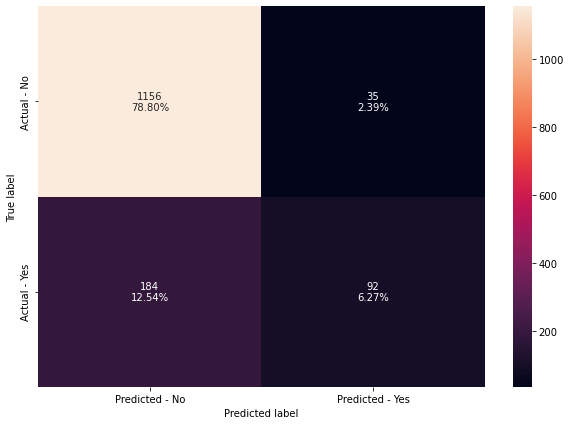

<IPython.core.display.Javascript object>

In [350]:
make_confusion_matrix(abc, y_test)

### ii. Gradient Boosting Classifier

In [351]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [352]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.884536685179772
Accuracy on test set :  0.8643490115882754
Recall on training set :  0.4472049689440994
Recall on test set :  0.391304347826087
Precision on training set :  0.8807339449541285
Precision on test set :  0.7769784172661871


<IPython.core.display.Javascript object>

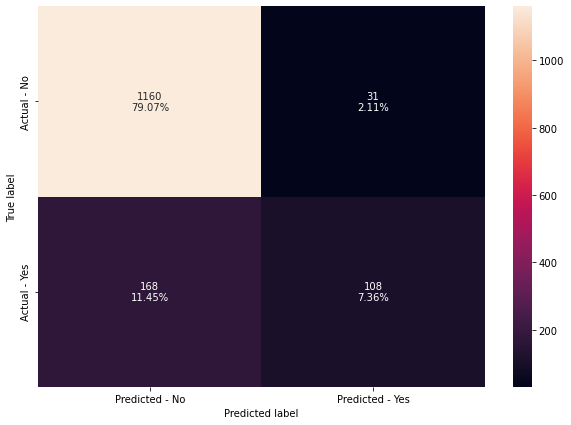

<IPython.core.display.Javascript object>

In [353]:
make_confusion_matrix(gbc, y_test)

### iii. XGBoost Classifier

In [354]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [355]:
# Using above defined function to get accuracy, recall and precision on train and test set
xgb_score = get_metrics_score(xgb)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.9209270620313565
Recall on training set :  0.9953416149068323
Recall on test set :  0.6847826086956522
Precision on training set :  1.0
Precision on test set :  0.8669724770642202


<IPython.core.display.Javascript object>

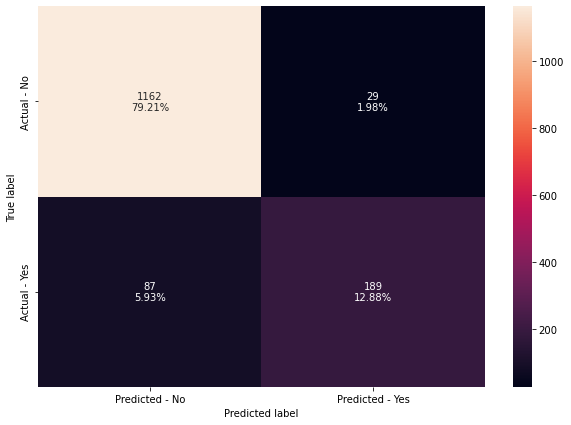

<IPython.core.display.Javascript object>

In [356]:
make_confusion_matrix(xgb, y_test)

**With default parameters:**
- AdaBoost classifier has better test accuracy among these 3 models.
- GB classifier has least test accuracy and test recall.

# 1.25 Model performance improvement - Boosting
### Hyperparameter Tuning



### i. AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [357]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.4000000000000001, n_estimators=100,
                   random_state=1)

<IPython.core.display.Javascript object>

In [358]:
# Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.9921075708857059
Accuracy on test set :  0.8609406952965235
Recall on training set :  0.967391304347826
Recall on test set :  0.6086956521739131
Precision on training set :  0.9904610492845787
Precision on test set :  0.6363636363636364


<IPython.core.display.Javascript object>

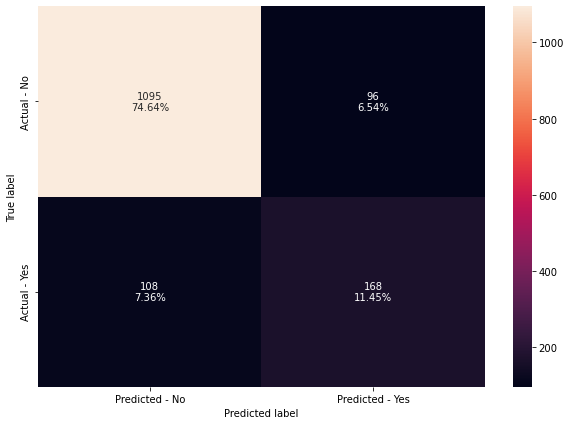

<IPython.core.display.Javascript object>

In [359]:
make_confusion_matrix(abc_tuned, y_test)

### Observations
- The model is overfitting the train data as train accuracy is much higher than the test accuracy.


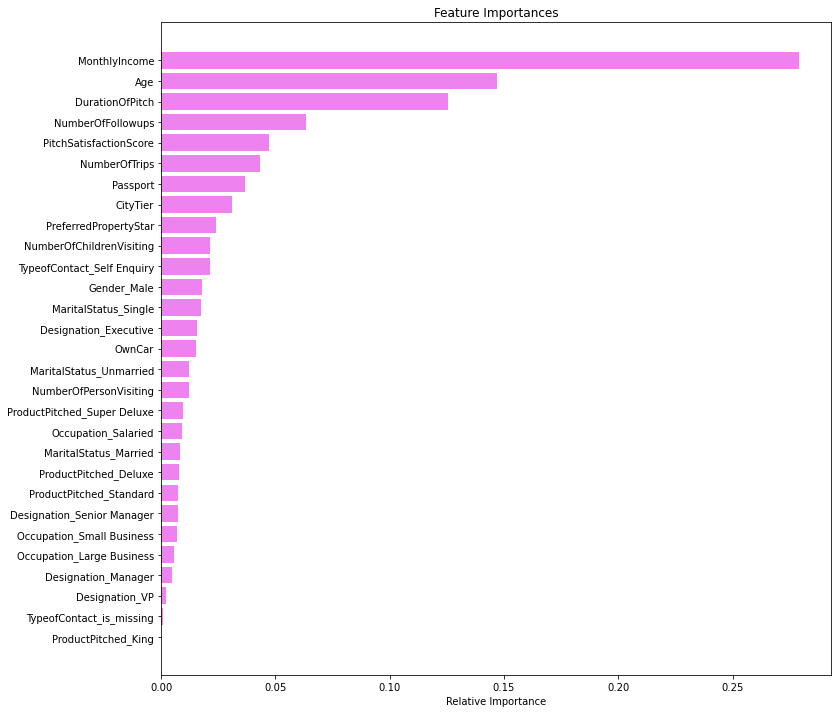

<IPython.core.display.Javascript object>

In [360]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

1. According to the tuned decision tree, **MonthlyIncome** is the most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package**.
2. The 3 most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package** are:
- MonthlyIncome.

- Age.

- DurationOfPitch.

### ii. Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [361]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

In [362]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score = get_metrics_score(gbc_init)

Accuracy on training set :  0.8854136217480268
Accuracy on test set :  0.8609406952965235
Recall on training set :  0.4503105590062112
Recall on test set :  0.35144927536231885
Precision on training set :  0.8841463414634146
Precision on test set :  0.7950819672131147


<IPython.core.display.Javascript object>

**As compared to the model with default parameters:**

- Test accuracy has increased slightly.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [363]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

In [364]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9193218357205496
Accuracy on test set :  0.8841172460804363
Recall on training set :  0.6040372670807453
Recall on test set :  0.4927536231884058
Precision on training set :  0.948780487804878
Precision on test set :  0.8192771084337349


<IPython.core.display.Javascript object>

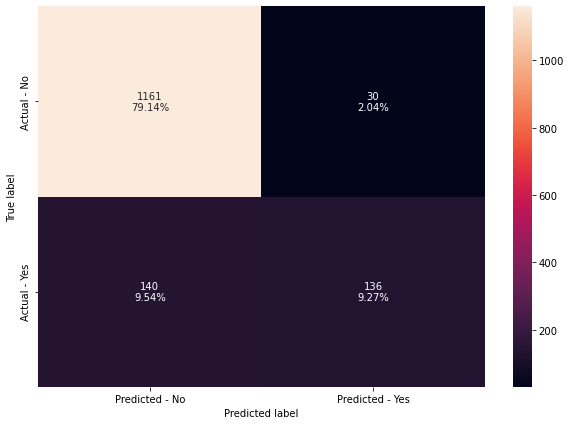

<IPython.core.display.Javascript object>

In [365]:
make_confusion_matrix(gbc_tuned, y_test)

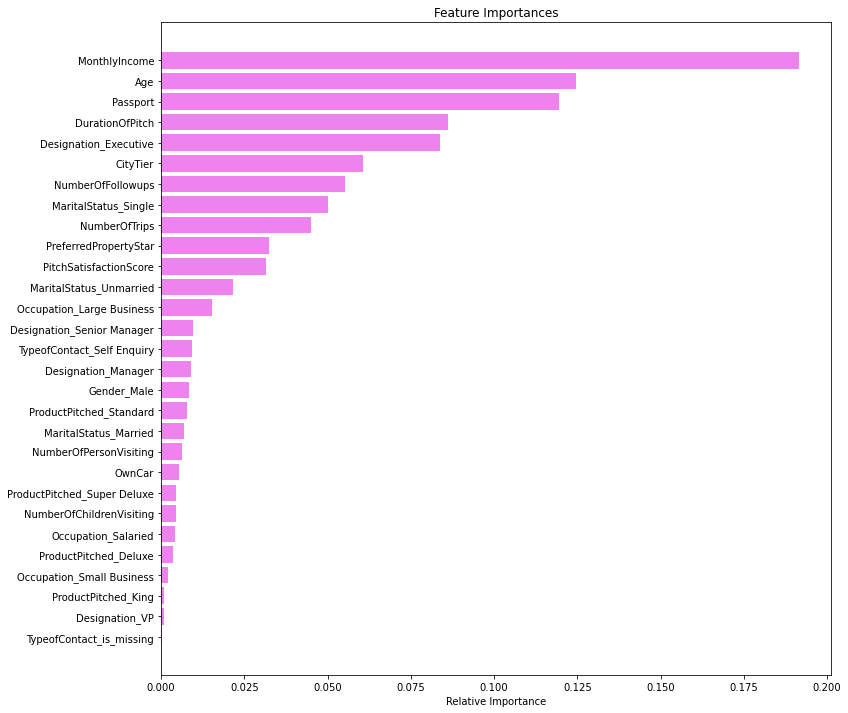

<IPython.core.display.Javascript object>

In [366]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

1. According to the tuned decision tree, **Passport** is the most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package**.
2. The 3 most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package** are:
- MonthlyIncome.

- Age.

- Passport.



### iii. XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance.

**Some of the important parameters are:**
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [367]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 1, 2, 5],
    "subsample": [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3],
    "colsample_bytree": [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [368]:
# Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9845074539608302
Accuracy on test set :  0.9045671438309475
Recall on training set :  0.9984472049689441
Recall on test set :  0.8152173913043478
Precision on training set :  0.9251798561151079
Precision on test set :  0.7165605095541401


<IPython.core.display.Javascript object>

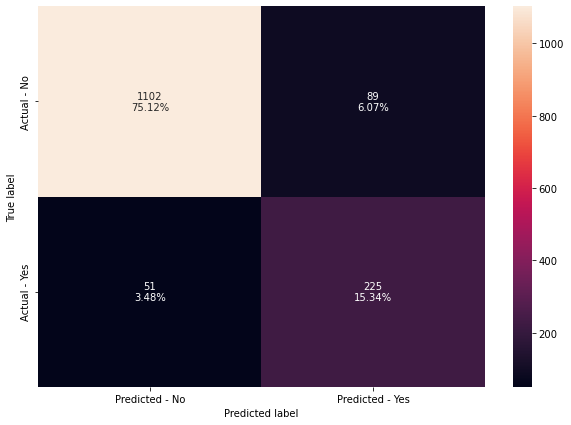

<IPython.core.display.Javascript object>

In [369]:
make_confusion_matrix(xgb_tuned, y_test)

### Observations
1. The recall has increased significantly and the model is able to identify most of the customer that has purchased a package.
2. Decreasing number of false negatives has increased the number of false positives here.
3. The tuned model is not overfitting and generalizes well.

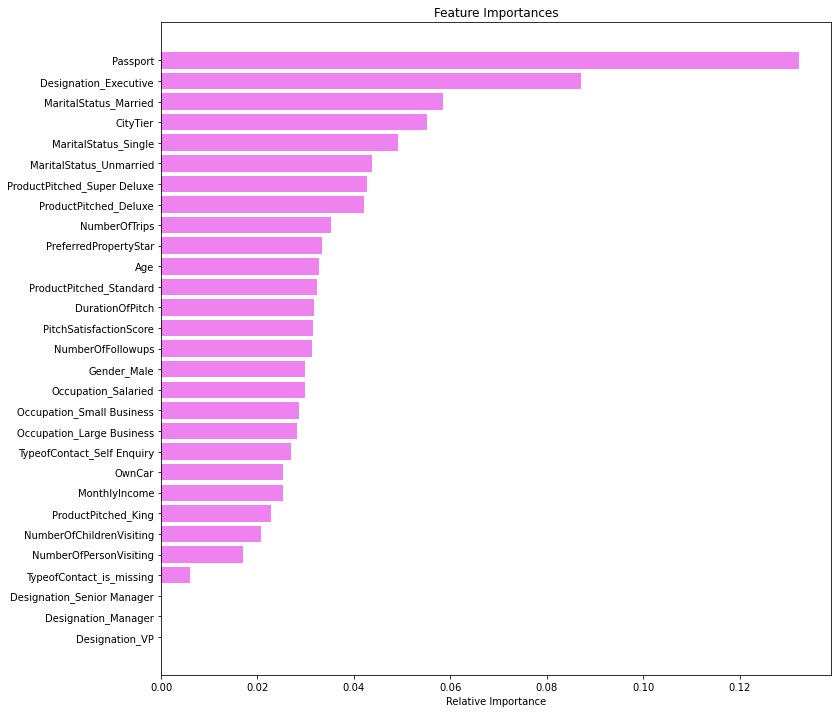

<IPython.core.display.Javascript object>

In [370]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

1. According to this model, **Passport** is the most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package**.
2. The 3 most important variable that can be used to identify the potential customers who have a higher probability of purchasing the **package** are:
- Passport.

- Designation-Executive.

- MaritalStatus_Married.



## 1.26 Comparing all models (Boosting)

In [371]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

<IPython.core.display.Javascript object>

In [372]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "AdaBoost with default paramters",
            "AdaBoost Tuned",
            "Gradient Boosting with default parameters",
            "Gradient Boosting with init=AdaBoost",
            "Gradient Boosting Tuned",
            "XGBoost with default parameters",
            "XGBoost Tuned",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0            AdaBoost with default paramters            0.85           0.85   
1                             AdaBoost Tuned            0.99           0.86   
2  Gradient Boosting with default parameters            0.88           0.86   
3       Gradient Boosting with init=AdaBoost            0.89           0.86   
4                    Gradient Boosting Tuned            0.92           0.88   
5            XGBoost with default parameters            1.00           0.92   
6                              XGBoost Tuned            0.98           0.90   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          0.32         0.33             0.71            0.72  
1          0.97         0.61             0.99            0.64  
2          0.45         0.39             0.88            0.78  
3          0.45         0.35             0.88            0.80  
4          0.60         0.49             0.95            0.82  
5          1.00         0.68             1.00            0.87  
6          1.00         0.82             0.93            0.72

<IPython.core.display.Javascript object>

# Conclusions

1. I analyzed the "**[Tourism dataset]** using different Ensemble Techniques such as:

- Bagging Model.
- Boosting Model. 
I used these methods to build a model that will help the Policy Maker of the company to enable and establish a viable business model to expand the customer base.
I visualized different trees and their respective confusion matrix inorder to get a better understanding of the model.

I used the Decision Trees to identify important features that will help to identify the potential customers who will purchase the packages.

I used hyper-parameters/ pruning to reduce overfitting.

# Recommendations
According to my observations from the created models -

1. The majority of the customers that were invited by the company purchased a package. Hence, the Policy Maker of the company should adopt a method of contacting customers through invitation.  This will expand the customer base.


2. The majority of the customers that purchased the product are Male. the Policy Maker of the company should adopt a method that will attract more Male as well as the Female Gender. They can achieve this goal by reducing the cost of the packages. 


3. The order of Package purchased by the customer is in this order:
**BASIC > STANDARD < DELUX >  KING > SUPER DELUXE**. It clearly shows that most customers prefer **SUPER DELUXE** package, while other customers prefer the other packages. The Policy Maker of the company can expand the customer base either by improving on the qualities of
- **SUPER DELUXE PACKAGE**, and 
- Adopting the loveable features of the **SUPER DELUXE PACKAGE**, and then applying it to the rest of the packages. This will greatly increase the customer base.

4. The Data shows that majority of the customers that purchased the package are either **Single** or **unmarried**. The Policy Maker of the company can expand the customer base by adopting or creating packages that are suitable for **divorced** and **married** customers.


5. The Data shows that majority of the customers that purchased the package are either **Executives** or **Senior Managers**. This is an indication of how expensive the packages are. The Policy Maker of the company can expand the customer base by reviewing the cost of these packages. This review will definitely make room for lower earners.


6. The Data shows that majority of the customers that purchased the package are either in category **2** or **3**. City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. The Policy Maker of the company can expand the customer base by creating **Packages** that can accomodate the customers in category **1**. 

7. The Data shows that majority of the customers that purchased the package are in increasing order of **NumberFollowUp**:
   **2**, **1**, **3**, **13**, **4**, **5**, **6**. Customers that were followed up 5-6 times are the major buyers of the packages. Hence, the Policy Maker of the company can expand the customer base by increasing the  **number of FollowUps** to 5-6 times.

8. The Data shows that the customers that use **5 star rated hotels** are the major buyers of the **packages**. The Policy Maker of the company can expand the customer base by creating **Packages** that can accomodate the customers that are unable to afford **5 star rated hotels**.

9. Furthermore, the data shows that customers with that own a **Passport** are the major buyers of the pacakages. The Policy Maker of the company can expand the customer base by creating **Packages** that can accomodate the customers that do not have a **Passport**. 


# Key Takeaways
The future importance plot reveals the most important variables for identifying the potential customers who have a higher probability of purchasing the package.
